# Cell Type Annotation

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.5 umap==0.5.2 numpy==1.20.0 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.0 pynndescent==0.5.5


In [3]:
adata_ttest=sc.read_h5ad('./write/MouseDataAnn.h5ad')
adata_wilcoxon=sc.read_h5ad('./write/MouseDataAnn.h5ad')
adata_logreg=sc.read_h5ad('./write/MouseDataAnn.h5ad')

In [26]:
results_filean = './write/MouseData_wilcoxon.h5ad'

In [4]:
adata_ttest

AnnData object with n_obs × n_vars = 4362 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## T-Test Annotation

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


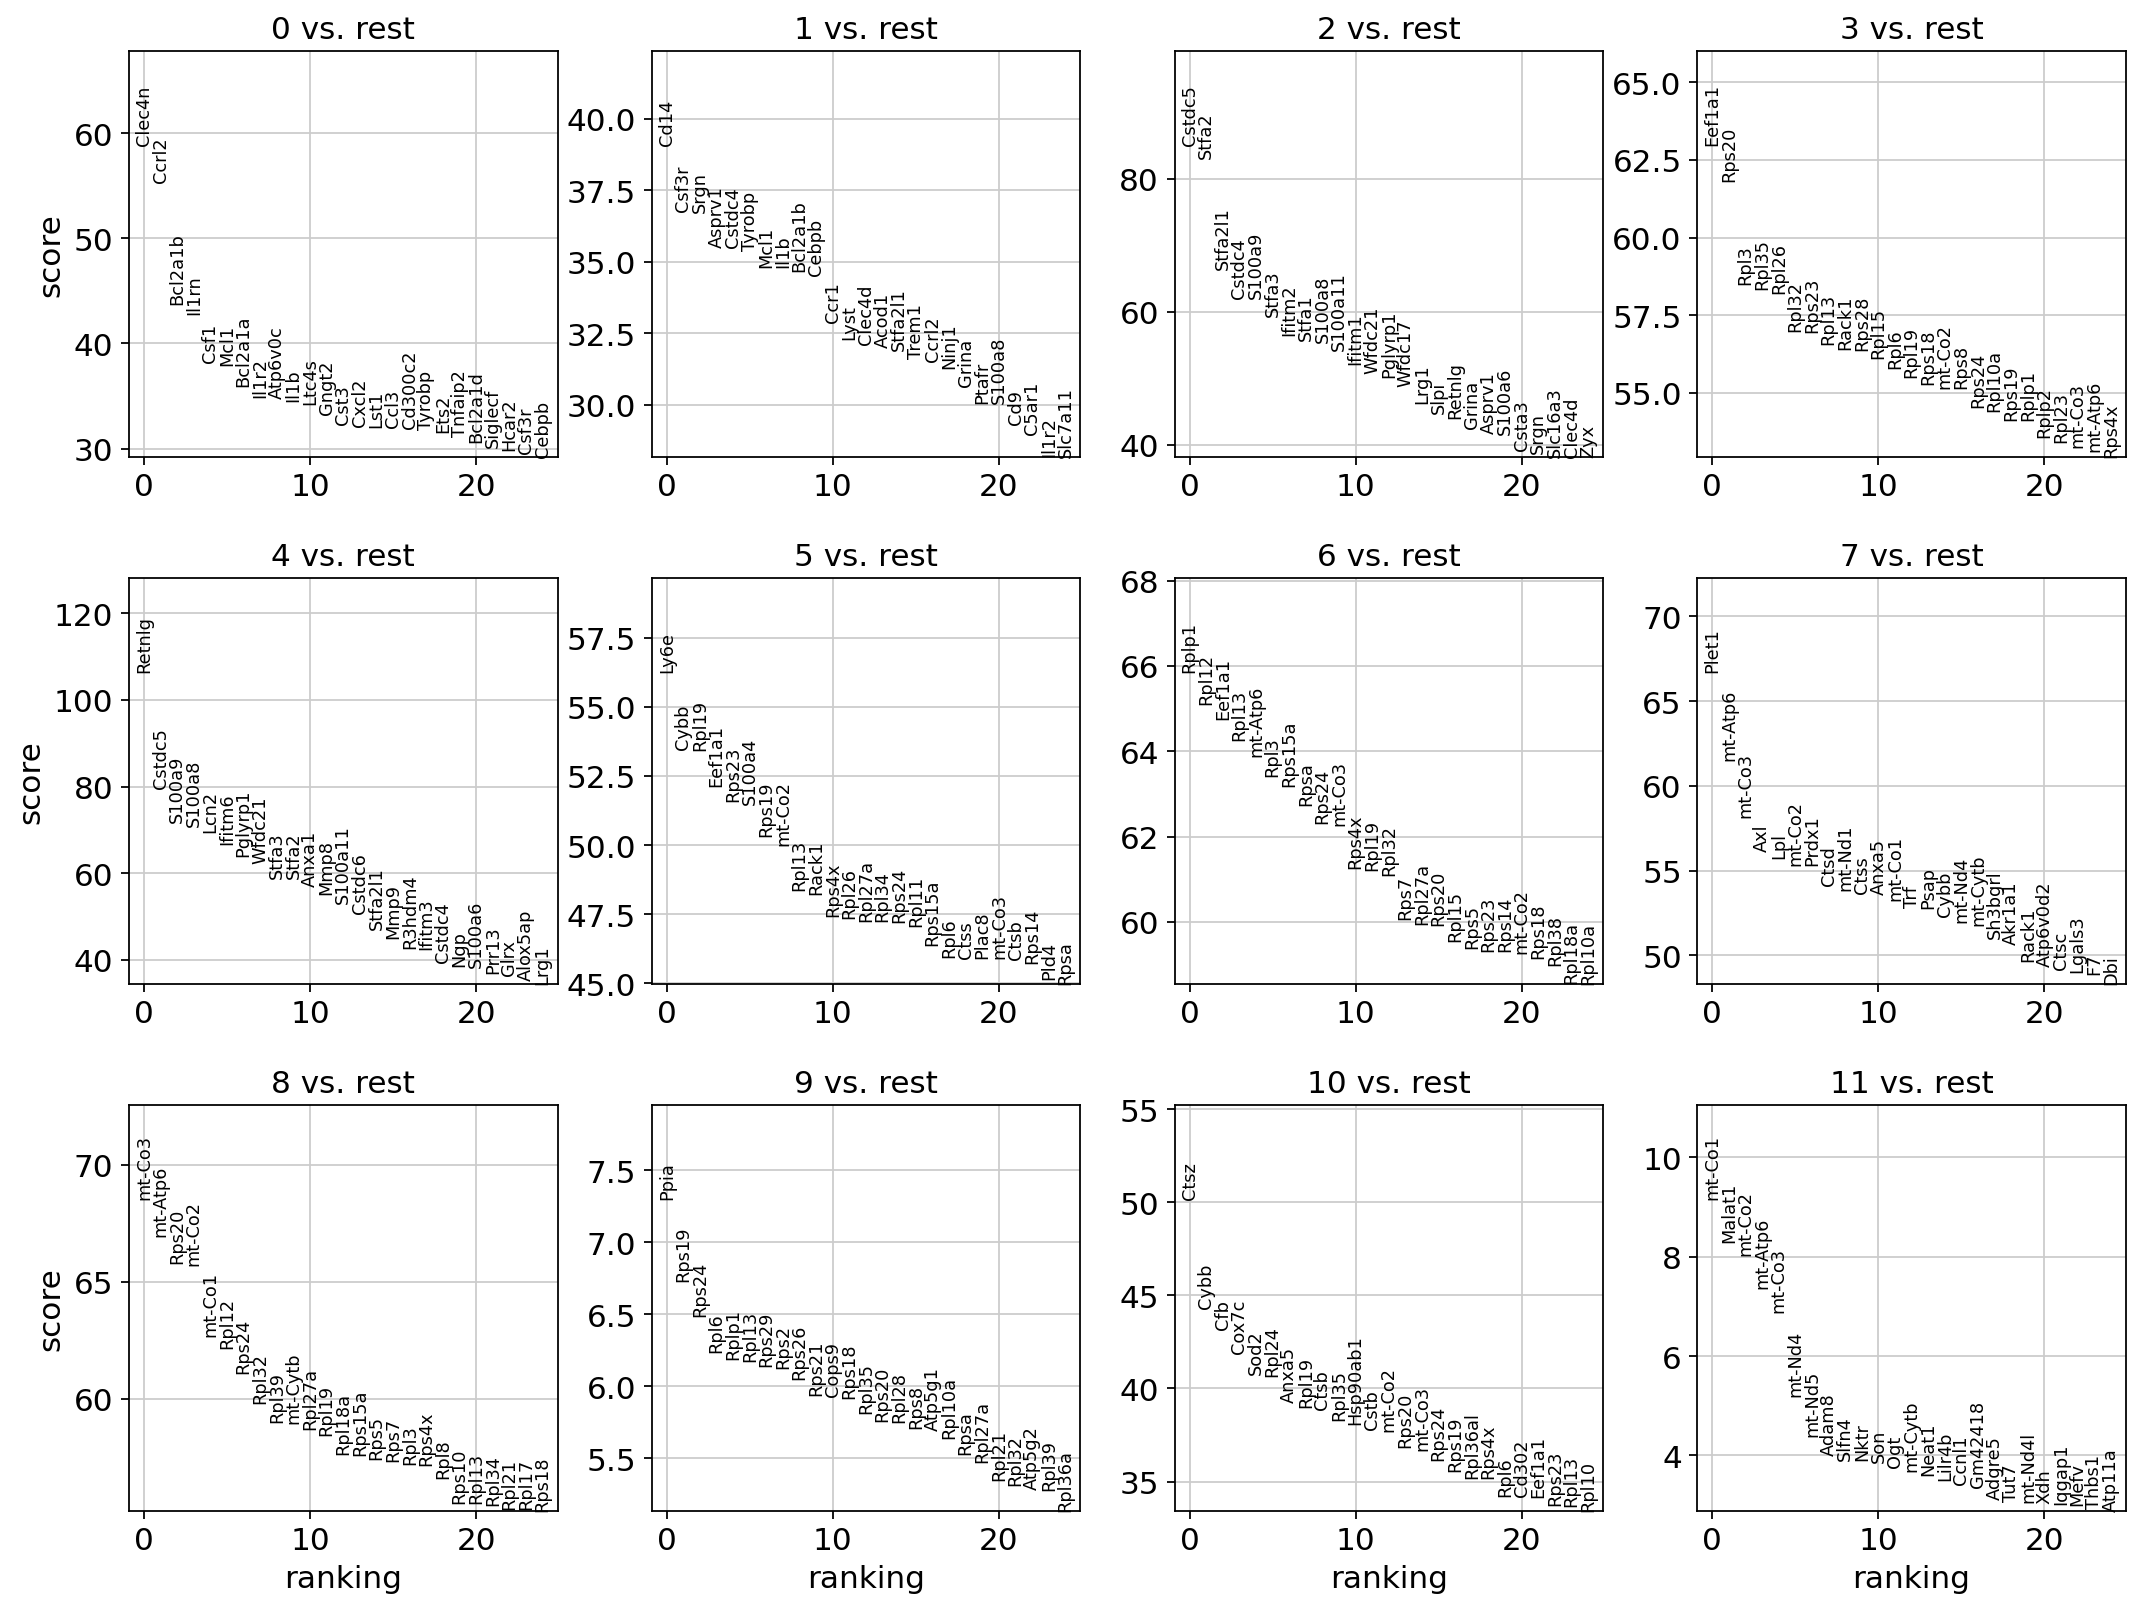

In [5]:
sc.tl.rank_genes_groups(adata_ttest, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_ttest, n_genes=25, sharey=False)

In [6]:
marker_genes = ['Clec4n','Cd14','Cstdc5','Eef1a1','Retnlg','Ly6e','Rplp1','Plet1','mt-Co3','Ppia','Ctsz','mt-Co1',
'Ccrl2','Srgn','Stfa2','Rps20','Cstdc5','Cybb','Rpl12','mt-Atp6','mt-Atp6','Rps19','Sod2','Malat1',
'Bcl2a1b','Csf3r','Stfa2l1','Rpl3','S100a9','Rpl19','Eef1a1','mt-Co3','Rps20','Rps24','Cfb','mt-Co2']

In [7]:
pd.DataFrame(adata_ttest.uns['rank_genes_groups']['names']).head(20)

0        1        2       3        4       5        6        7  \
0    Clec4n     Cd14   Cstdc5  Eef1a1   Retnlg    Ly6e    Rplp1    Plet1   
1     Ccrl2    Csf3r    Stfa2   Rps20   Cstdc5    Cybb    Rpl12  mt-Atp6   
2   Bcl2a1b     Srgn  Stfa2l1    Rpl3   S100a9   Rpl19   Eef1a1   mt-Co3   
3     Il1rn   Asprv1   Cstdc4   Rpl35   S100a8  Eef1a1    Rpl13      Axl   
4      Csf1   Cstdc4   S100a9   Rpl26     Lcn2   Rps23  mt-Atp6      Lpl   
5      Mcl1   Tyrobp    Stfa3   Rpl32   Ifitm6  S100a4     Rpl3   mt-Co2   
6   Bcl2a1a     Mcl1   Ifitm2   Rps23  Pglyrp1   Rps19   Rps15a    Prdx1   
7     Il1r2     Il1b    Stfa1   Rpl13   Wfdc21  mt-Co2     Rpsa     Ctsd   
8   Atp6v0c  Bcl2a1b   S100a8   Rack1    Stfa3   Rpl13    Rps24   mt-Nd1   
9      Il1b    Cebpb  S100a11   Rps28    Stfa2   Rack1   mt-Co3     Ctss   
10    Ltc4s     Ccr1   Ifitm1   Rpl15    Anxa1   Rps4x    Rps4x    Anxa5   
11    Gngt2     Lyst   Wfdc21    Rpl6     Mmp8   Rpl26    Rpl19   mt-Co1   
12     Cst3   Clec4d  Pglyrp1   Rpl19  S100a11  Rpl27a    Rpl32      Trf   
13    Cxcl2    Acod1   Wfdc17   Rps18   Cstdc6   Rpl34     Rps7     Psap   
14     Lst1  Stfa2l1     Lrg1  mt-Co2  Stfa2l1   Rps24   Rpl27a     Cybb   
15     Ccl3    Trem1     Slpi    Rps8     Mmp9   Rpl11    Rps20   mt-Nd4   
16  Cd300c2    Ccrl2   Retnlg   Rps24   R3hdm4  Rps15a    Rpl15  mt-Cytb   
17   Tyrobp    Ninj1    Grina  Rpl10a   Ifitm3    Rpl6     Rps5  Sh3bgrl   
18     Ets2    Grina   Asprv1   Rps19   Cstdc4    Ctss    Rps23   Akr1a1   
19  Tnfaip2    Ptafr   S100a6   Rplp1      Ngp   Plac8    Rps14    Rack1   

          8       9        10       11  
0    mt-Co3    Ppia      Ctsz   mt-Co1  
1   mt-Atp6   Rps19      Cybb   Malat1  
2     Rps20   Rps24       Cfb   mt-Co2  
3    mt-Co2    Rpl6     Cox7c  mt-Atp6  
4    mt-Co1   Rplp1      Sod2   mt-Co3  
5     Rpl12   Rpl13     Rpl24   mt-Nd4  
6     Rps24   Rps29     Anxa5   mt-Nd5  
7     Rpl32    Rps2     Rpl19    Adam8  
8     Rpl39   Rps26      Ctsb    Slfn4  
9   mt-Cytb   Rps21     Rpl35     Nktr  
10   Rpl27a   Cops9  Hsp90ab1      Son  
11    Rpl19   Rps18      Cstb      Ogt  
12   Rpl18a   Rpl35    mt-Co2  mt-Cytb  
13   Rps15a   Rps20     Rps20    Neat1  
14     Rps5   Rpl28    mt-Co3   Lilr4b  
15     Rps7    Rps8     Rps24    Ccnl1  
16     Rpl3  Atp5g1     Rps19  Gm42418  
17    Rps4x  Rpl10a   Rpl36al   Adgre5  
18     Rpl8    Rpsa     Rps4x     Tut7  
19    Rps10  Rpl27a      Rpl6  mt-Nd4l

In [8]:
result = adata_ttest.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores']}).head(10)

0_n        0_s      1_n        1_s      2_n        2_s     3_n  \
0   Clec4n  58.897842     Cd14  39.093571   Cstdc5  85.070145  Eef1a1   
1    Ccrl2  55.411213    Csf3r  36.778126    Stfa2  83.156090   Rps20   
2  Bcl2a1b  43.785793     Srgn  36.739479  Stfa2l1  66.367554    Rpl3   
3    Il1rn  42.757797   Asprv1  35.530521   Cstdc4  62.046799   Rpl35   
4     Csf1  38.225399   Cstdc4  35.528088   S100a9  62.026257   Rpl26   
5     Mcl1  37.903114   Tyrobp  35.411415    Stfa3  59.388798   Rpl32   
6  Bcl2a1a  35.911121     Mcl1  34.818916   Ifitm2  56.495758   Rps23   
7    Il1r2  34.861565     Il1b  34.812325    Stfa1  55.794056   Rpl13   
8  Atp6v0c  34.827354  Bcl2a1b  34.686039   S100a8  55.407490   Rack1   
9     Il1b  34.549183    Cebpb  34.537807  S100a11  54.226002   Rps28   

         3_s      4_n         4_s  ...      7_n        7_s      8_n  \
0  62.985500   Retnlg  106.476982  ...    Plet1  66.722206   mt-Co3   
1  61.820492   Cstdc5   79.564804  ...  mt-Atp6  61.519566  mt-Atp6   
2  58.506134   S100a9   71.877541  ...   mt-Co3  58.139862    Rps20   
3  58.334126   S100a8   70.903175  ...      Axl  56.140503   mt-Co2   
4  58.221344     Lcn2   69.438698  ...      Lpl  55.725574   mt-Co1   
5  56.997066   Ifitm6   66.799210  ...   mt-Co2  55.326946    Rpl12   
6  56.972095  Pglyrp1   63.881355  ...    Prdx1  55.306664    Rps24   
7  56.587990   Wfdc21   62.380833  ...     Ctsd  54.155899    Rpl32   
8  56.413490    Stfa3   58.861866  ...   mt-Nd1  53.852016    Rpl39   
9  56.393230    Stfa2   58.807808  ...     Ctss  53.677189  mt-Cytb   

         8_s    9_n       9_s   10_n       10_s     11_n      11_s  
0  68.543564   Ppia  7.303604   Ctsz  50.193966   mt-Co1  9.166620  
1  66.943008  Rps19  6.735485   Cybb  44.306053   Malat1  8.285852  
2  65.799538  Rps24  6.492488    Cfb  43.176838   mt-Co2  8.032364  
3  65.694099   Rpl6  6.241158  Cox7c  41.882996  mt-Atp6  7.364690  
4  62.678204  Rplp1  6.188399   Sod2  40.753456   mt-Co3  6.895005  
5  62.167164  Rpl13  6.176277  Rpl24  40.679150   mt-Nd4  5.193313  
6  61.114285  Rps29  6.140487  Anxa5  39.258598   mt-Nd5  4.382919  
7  59.817238   Rps2  6.129514  Rpl19  39.002411    Adam8  4.010553  
8  59.002068  Rps26  6.048823   Ctsb  38.874138    Slfn4  3.913279  
9  58.984104  Rps21  5.938082  Rpl35  38.297935     Nktr  3.903486  

[10 rows x 24 columns]

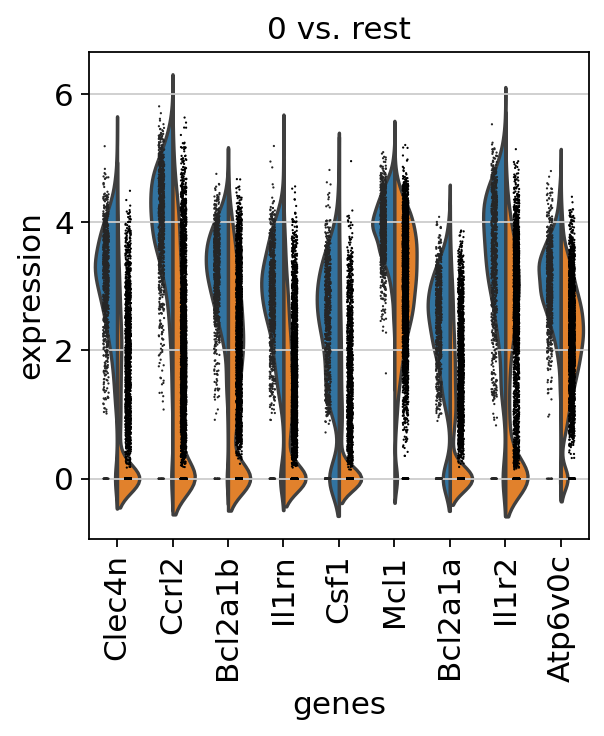

In [9]:
sc.pl.rank_genes_groups_violin(adata_ttest, groups='0', n_genes=9)

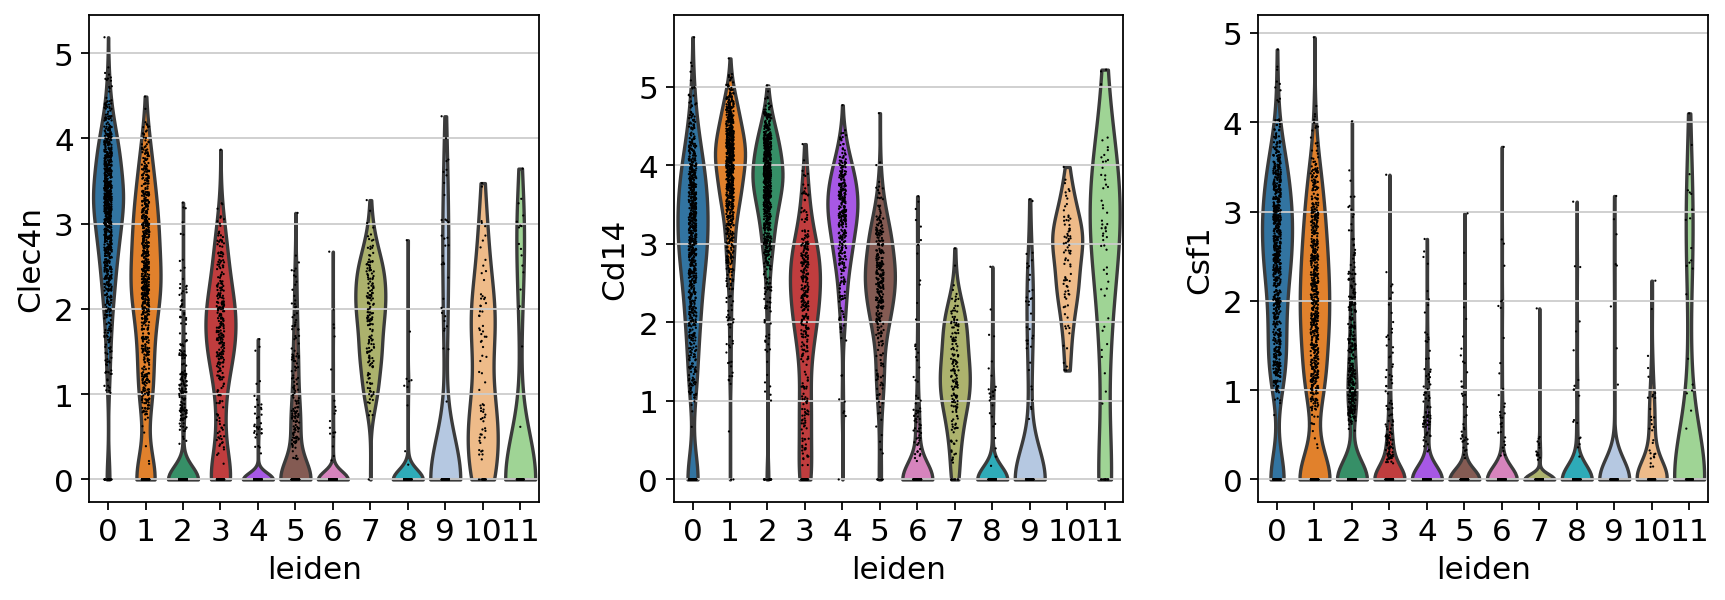

In [10]:
sc.pl.violin(adata_ttest, ['Clec4n', 'Cd14', 'Csf1'], groupby='leiden')

In [11]:
new_cluster_names = [
    'uno', 'Myeloid', 'Neutrophils', 'tre','quattro', 'Monocytes','T cells', 'Macrophages','B cells','nove','Monocytes?','Mitochondria']
adata_ttest.rename_categories('leiden', new_cluster_names)

/home/chiara/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


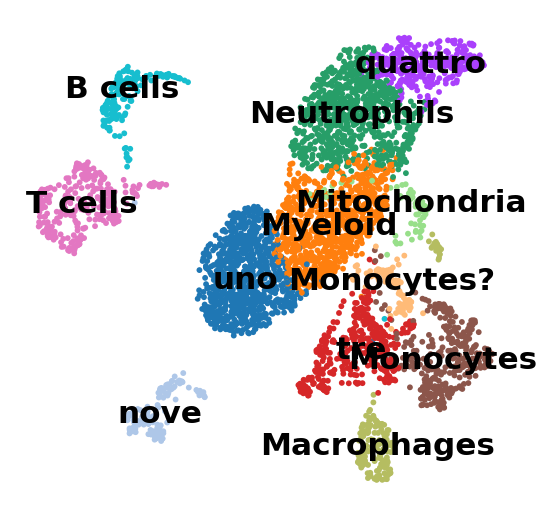

In [12]:
sc.pl.umap(adata_ttest,color='leiden',legend_loc='on data', title='', frameon=False, save='.pdf')

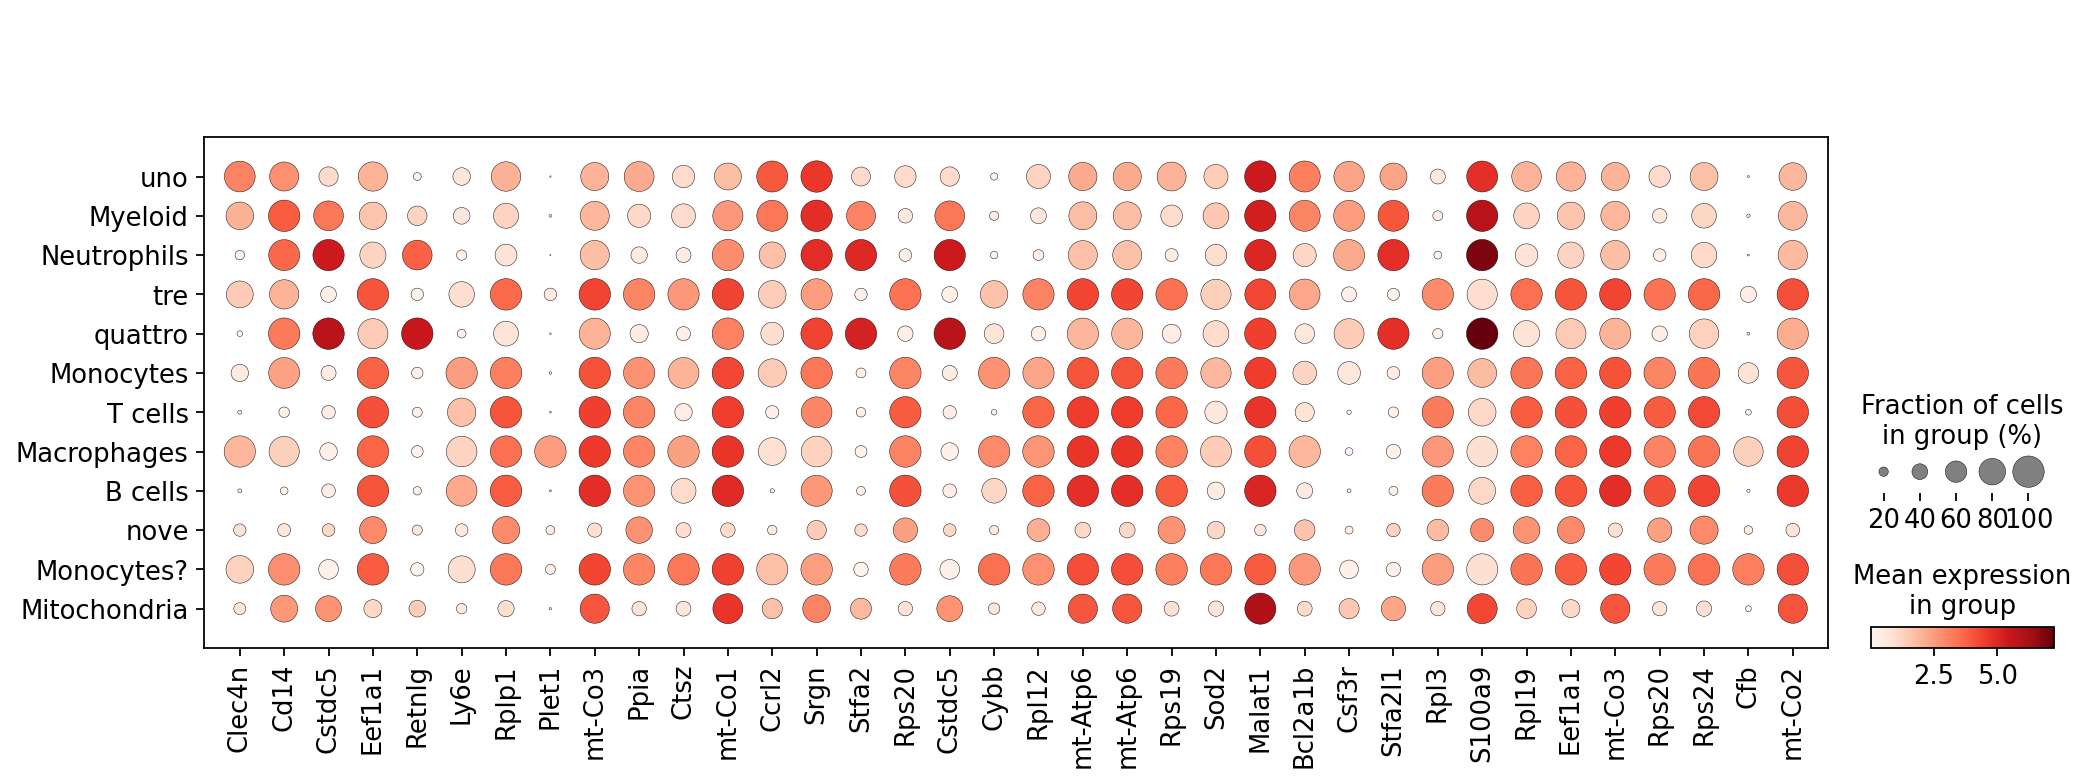

In [13]:
sc.pl.dotplot(adata_ttest, marker_genes, groupby='leiden')

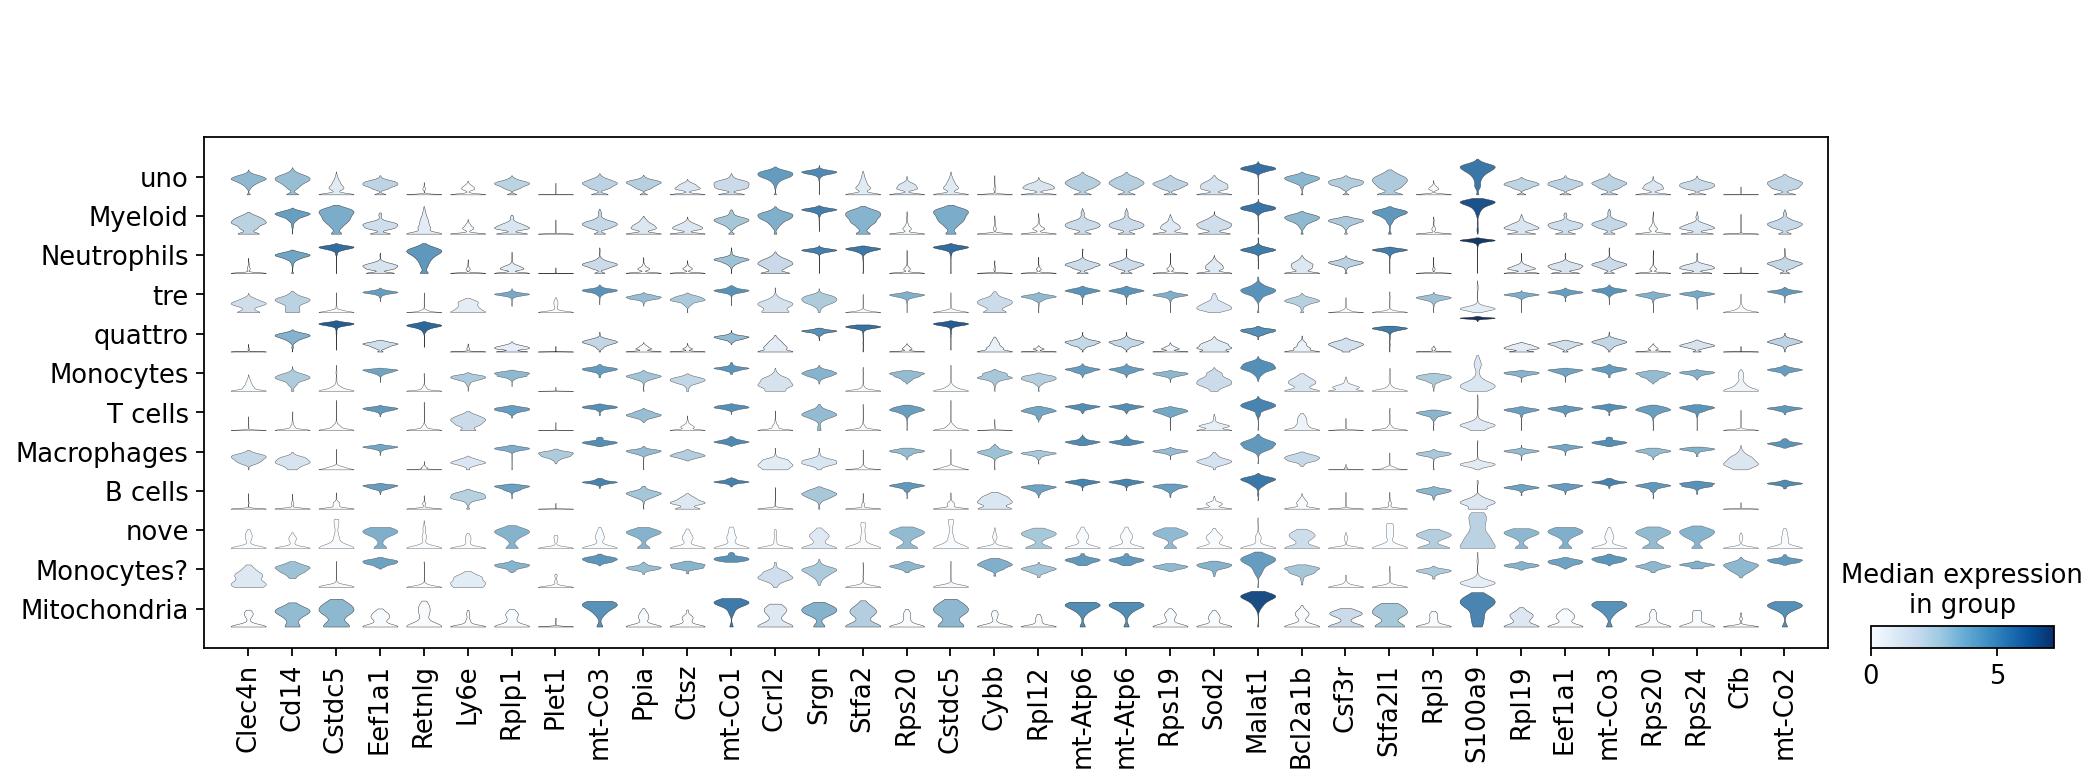

In [14]:
sc.pl.stacked_violin(adata_ttest, marker_genes, groupby='leiden',rotation=90)

## Wilcoxon Annotation

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


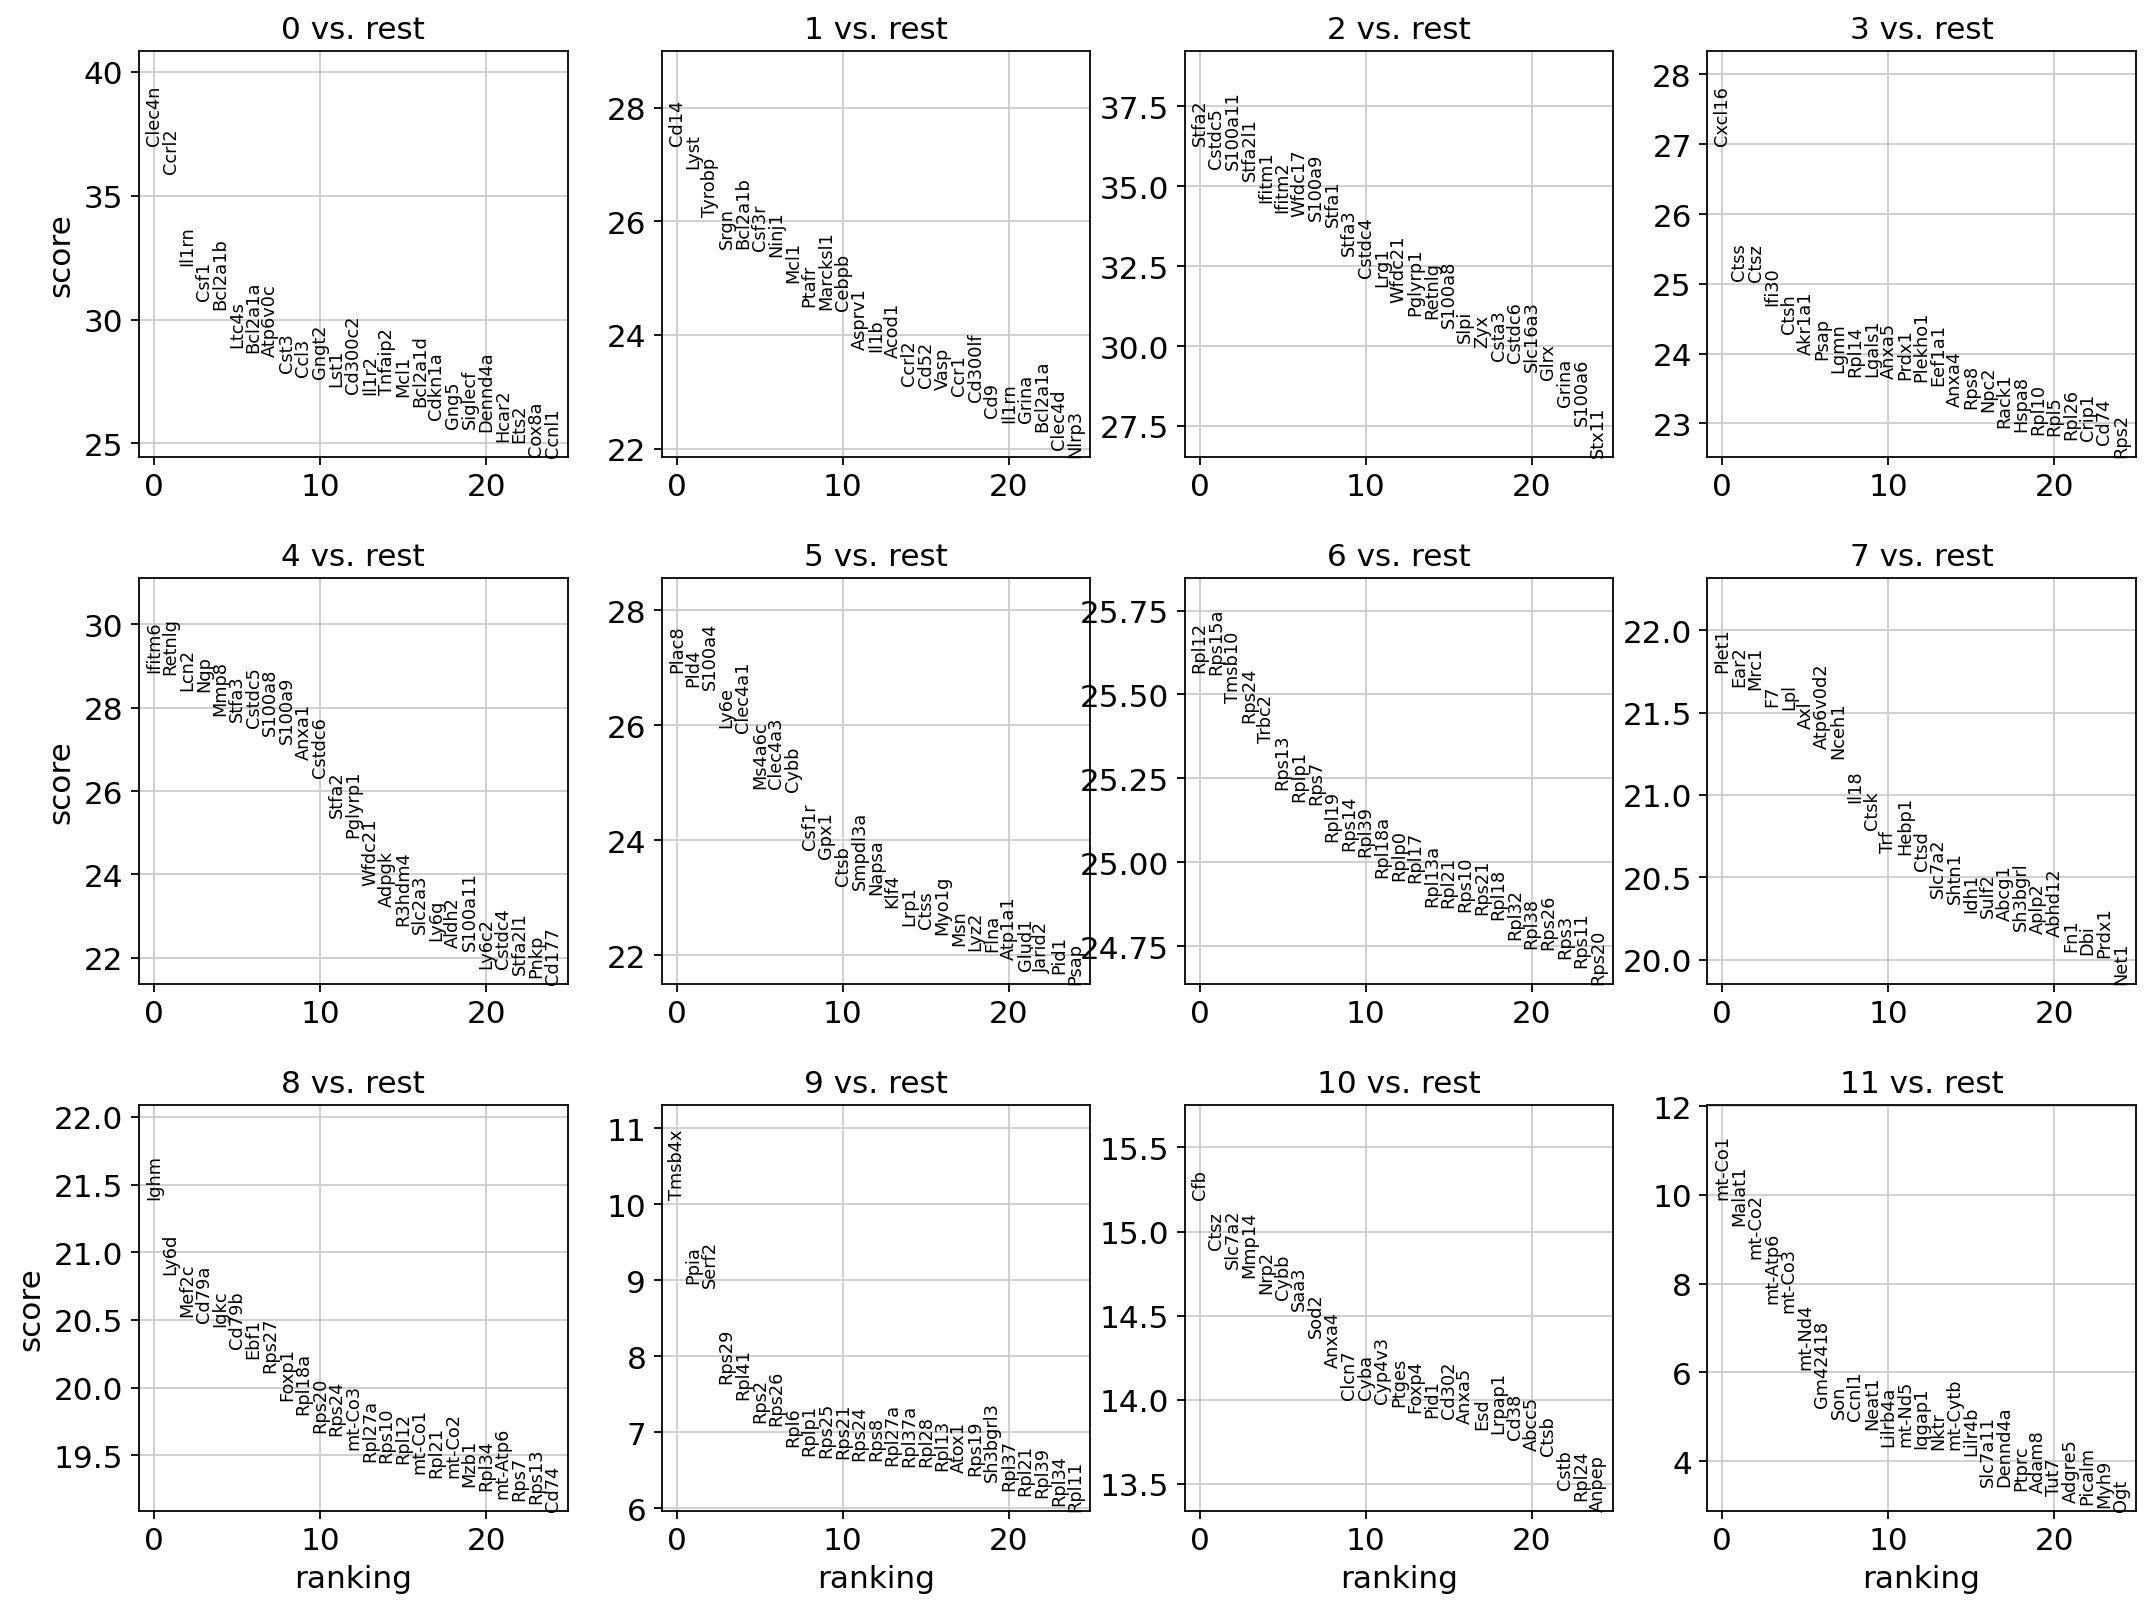

In [15]:
sc.tl.rank_genes_groups(adata_wilcoxon, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_wilcoxon, n_genes=25, sharey=False)

In [16]:
marker_genes_w = ['Clec4n',	'Cd14',	'Stfa2','Cxcl16',	'Ifitm6',	'Plac8',	'Rpl12',	'Plet1',	'Ighm',		'Cfb',
'Ccrl2',	'Lyst',	'Cstdc5',	'Ctss',	'Retnlg',	'Pld4',	'Rps15a',	'Ear2',	'Ly6d',	'Ppia',	'Ctsz',
'Il1rn',	'Tyrobp',	'S100a11',	'Ctsz',	'Lcn2',	'S100a4',	'Tmsb10',	'Mrc1',	'Mef2c',	'Serf2',	'Slc7a2',
'Csf1',	'Srgn',	'Stfa2l1',	'Ifi30',	'Ngp',	'Ly6e',	'Rps24',	'F7',	'Cd79a',	'Rps29',	'Mmp14']

In [17]:
pd.DataFrame(adata_wilcoxon.uns['rank_genes_groups']['names']).to_csv('wilcoxon.csv')

In [18]:
result = adata_wilcoxon.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores']}).head(10)

0_n        0_s       1_n        1_s      2_n        2_s     3_n  \
0   Clec4n  37.056999      Cd14  27.342823    Stfa2  36.296669  Cxcl16   
1    Ccrl2  35.939060      Lyst  26.932800   Cstdc5  35.576355    Ctss   
2    Il1rn  32.190598    Tyrobp  26.093494  S100a11  35.545113    Ctsz   
3     Csf1  30.782167      Srgn  25.537415  Stfa2l1  35.204941   Ifi30   
4  Bcl2a1b  30.433306   Bcl2a1b  25.528225   Ifitm1  34.496944    Ctsh   
5    Ltc4s  28.886904     Csf3r  25.496098   Ifitm2  34.205116  Akr1a1   
6  Bcl2a1a  28.697287     Ninj1  25.389191   Wfdc17  34.064365    Psap   
7  Atp6v0c  28.546783      Mcl1  24.938681   S100a9  33.938877    Lgmn   
8     Cst3  27.905251     Ptafr  24.508799    Stfa1  33.768711   Rpl14   
9     Ccl3  27.722178  Marcksl1  24.451227    Stfa3  32.840328  Lgals1   

         3_s     4_n        4_s  ...       7_n        7_s     8_n        8_s  \
0  26.990774  Ifitm6  28.861250  ...     Plet1  21.746758    Ighm  21.395626   
1  25.050898  Retnlg  28.803045  ...      Ear2  21.661787    Ly6d  20.840824   
2  25.039103    Lcn2  28.428726  ...      Mrc1  21.642607   Mef2c  20.532455   
3  24.702814     Ngp  28.408567  ...        F7  21.541704   Cd79a  20.487860   
4  24.298067    Mmp8  27.821152  ...       Lpl  21.521212    Igkc  20.454611   
5  23.990122   Stfa3  27.690666  ...       Axl  21.404907   Cd79b  20.294388   
6  23.928680  Cstdc5  27.529102  ...  Atp6v0d2  21.283169    Ebf1  20.217272   
7  23.740681  S100a8  27.355392  ...     Nceh1  21.225096   Rps27  20.112137   
8  23.685989  S100a9  27.157780  ...      Il18  20.955158   Foxp1  19.908524   
9  23.678970   Anxa1  26.768864  ...      Ctsk  20.795900  Rpl18a  19.803801   

      9_n        9_s    10_n       10_s     11_n      11_s  
0  Tmsb4x  10.071598     Cfb  15.194988   mt-Co1  9.914377  
1    Ppia   8.968267    Ctsz  14.896523   Malat1  9.324433  
2   Serf2   8.915539  Slc7a2  14.781175   mt-Co2  8.586433  
3   Rps29   7.649502   Mmp14  14.731645  mt-Atp6  7.564377  
4   Rpl41   7.434216    Nrp2  14.632762   mt-Co3  7.350281  
5    Rps2   7.132854    Cybb  14.597175   mt-Nd4  6.073046  
6   Rps26   7.096948    Saa3  14.535472  Gm42418  5.223408  
7    Rpl6   6.821893    Sod2  14.374975      Son  4.969717  
8   Rplp1   6.693982   Anxa4  14.196640    Ccnl1  4.932901  
9   Rps25   6.669600   Clcn7  14.006398    Neat1  4.713149  

[10 rows x 24 columns]

In [19]:
new_cluster_names_w = [
    'Macrofagi Alveolari','Monociti1','Neutrofili','Monociti2','Precursori di Monociti','Macrofagi1','Cd4 T Cells','Macrofagi2','B-cells','T cells', 'Macrofagi3','Macrofagi4']
adata_wilcoxon.rename_categories('leiden', new_cluster_names_w)

/home/chiara/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


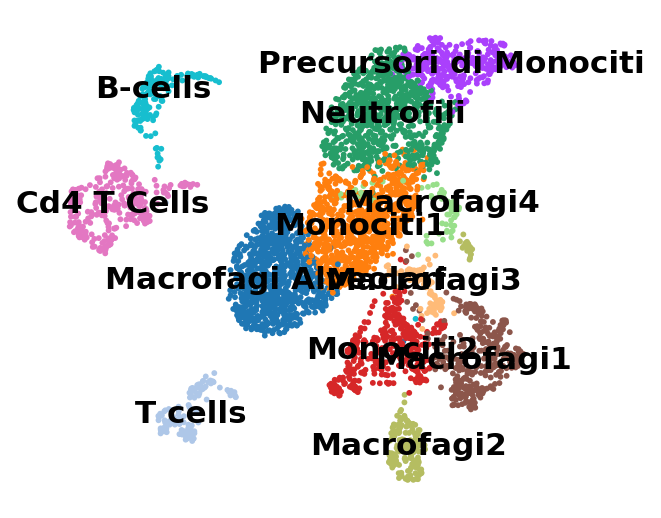

In [20]:
sc.pl.umap(adata_wilcoxon,color='leiden',legend_loc='on data', title='', frameon=False, save='.pdf')

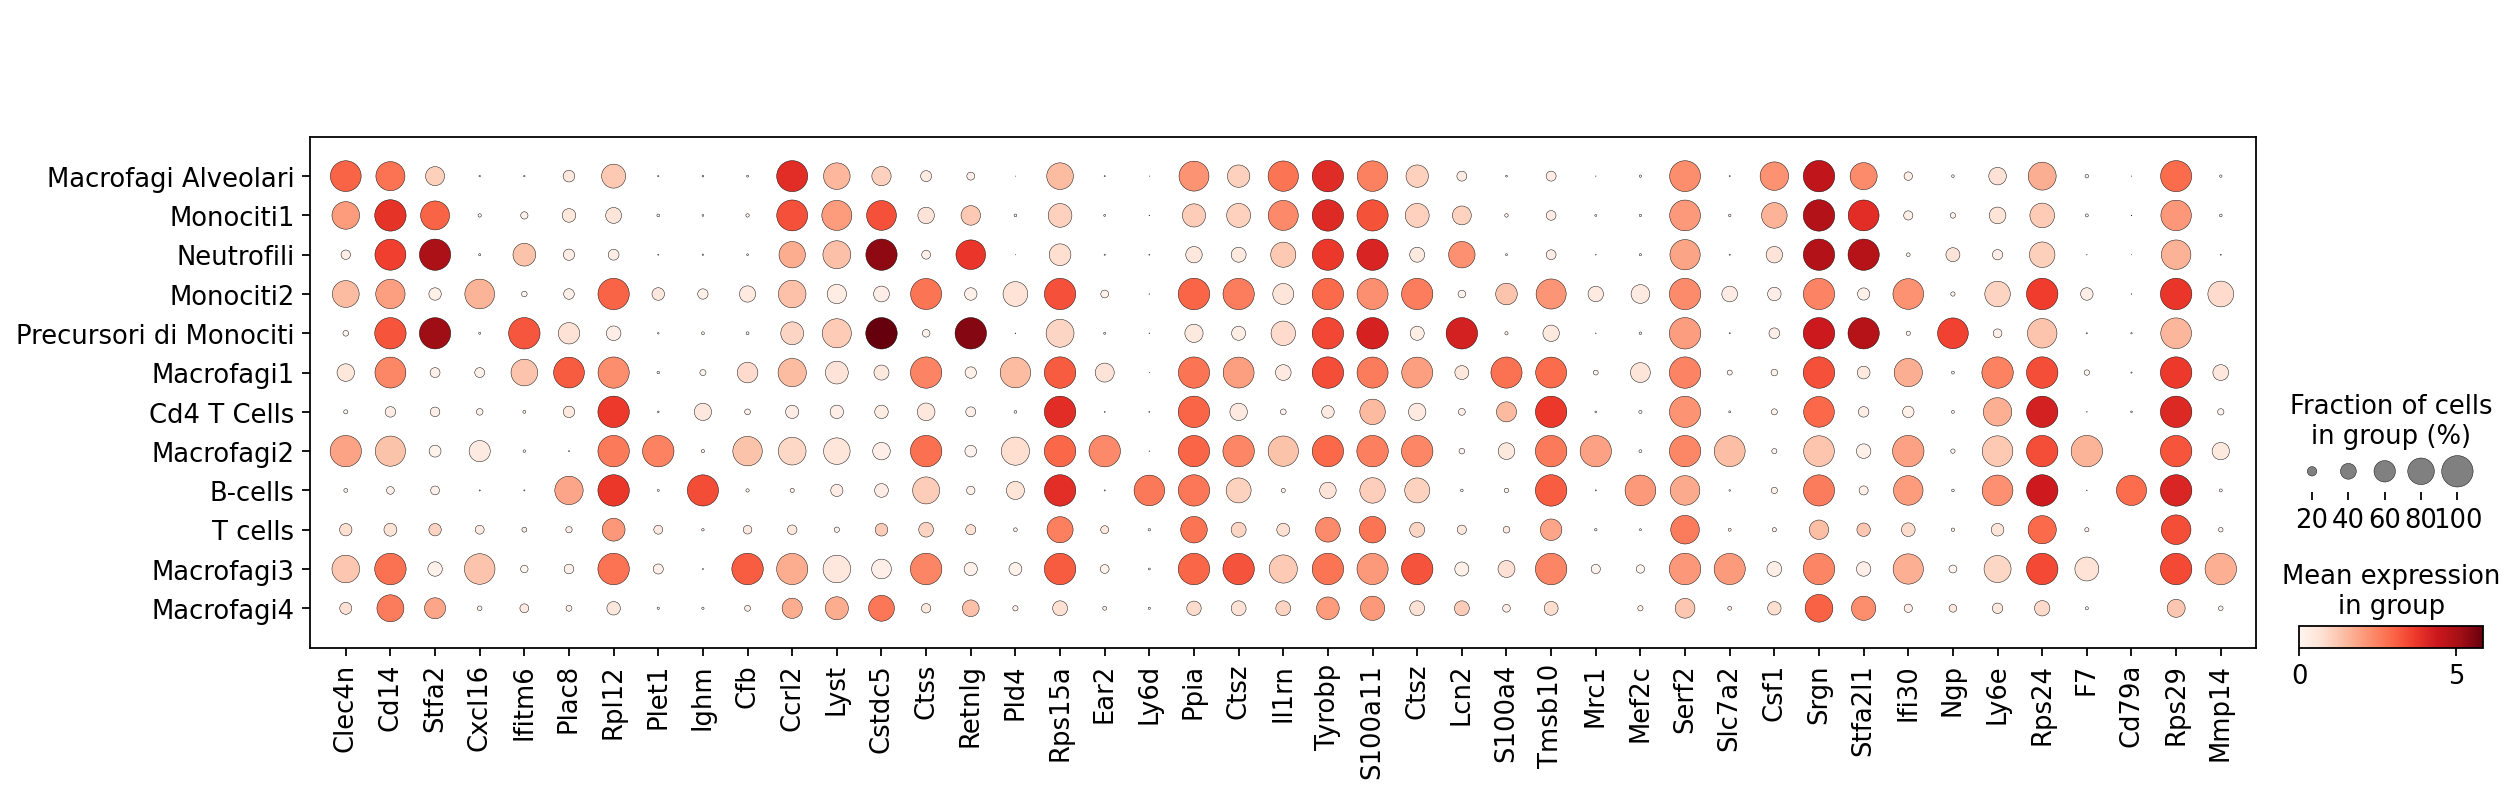

In [21]:
sc.pl.dotplot(adata_wilcoxon, marker_genes_w, groupby='leiden')
#plet1 che risulta espresso solo nel cluster 8 (segnato come macrofagi) è Placenta-expressed transcript 1 protein precursor

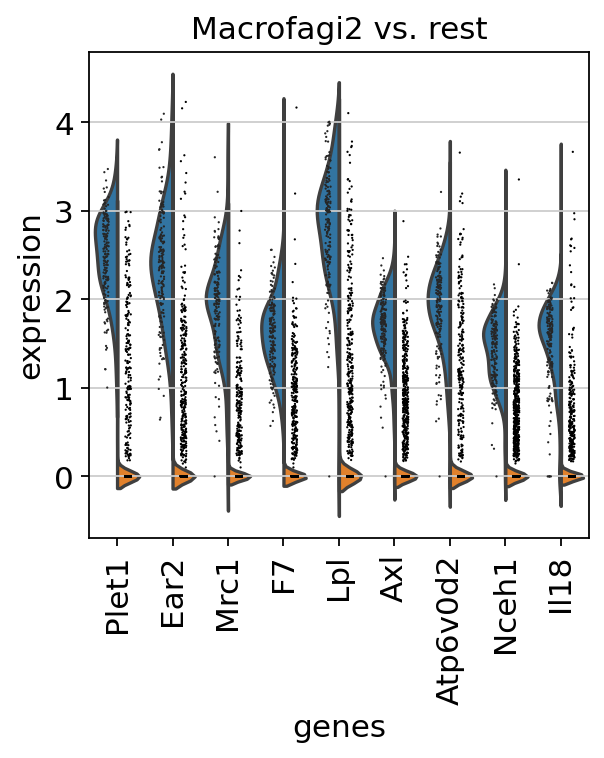

In [22]:
sc.pl.rank_genes_groups_violin(adata_wilcoxon, groups='Macrofagi2', n_genes=9)

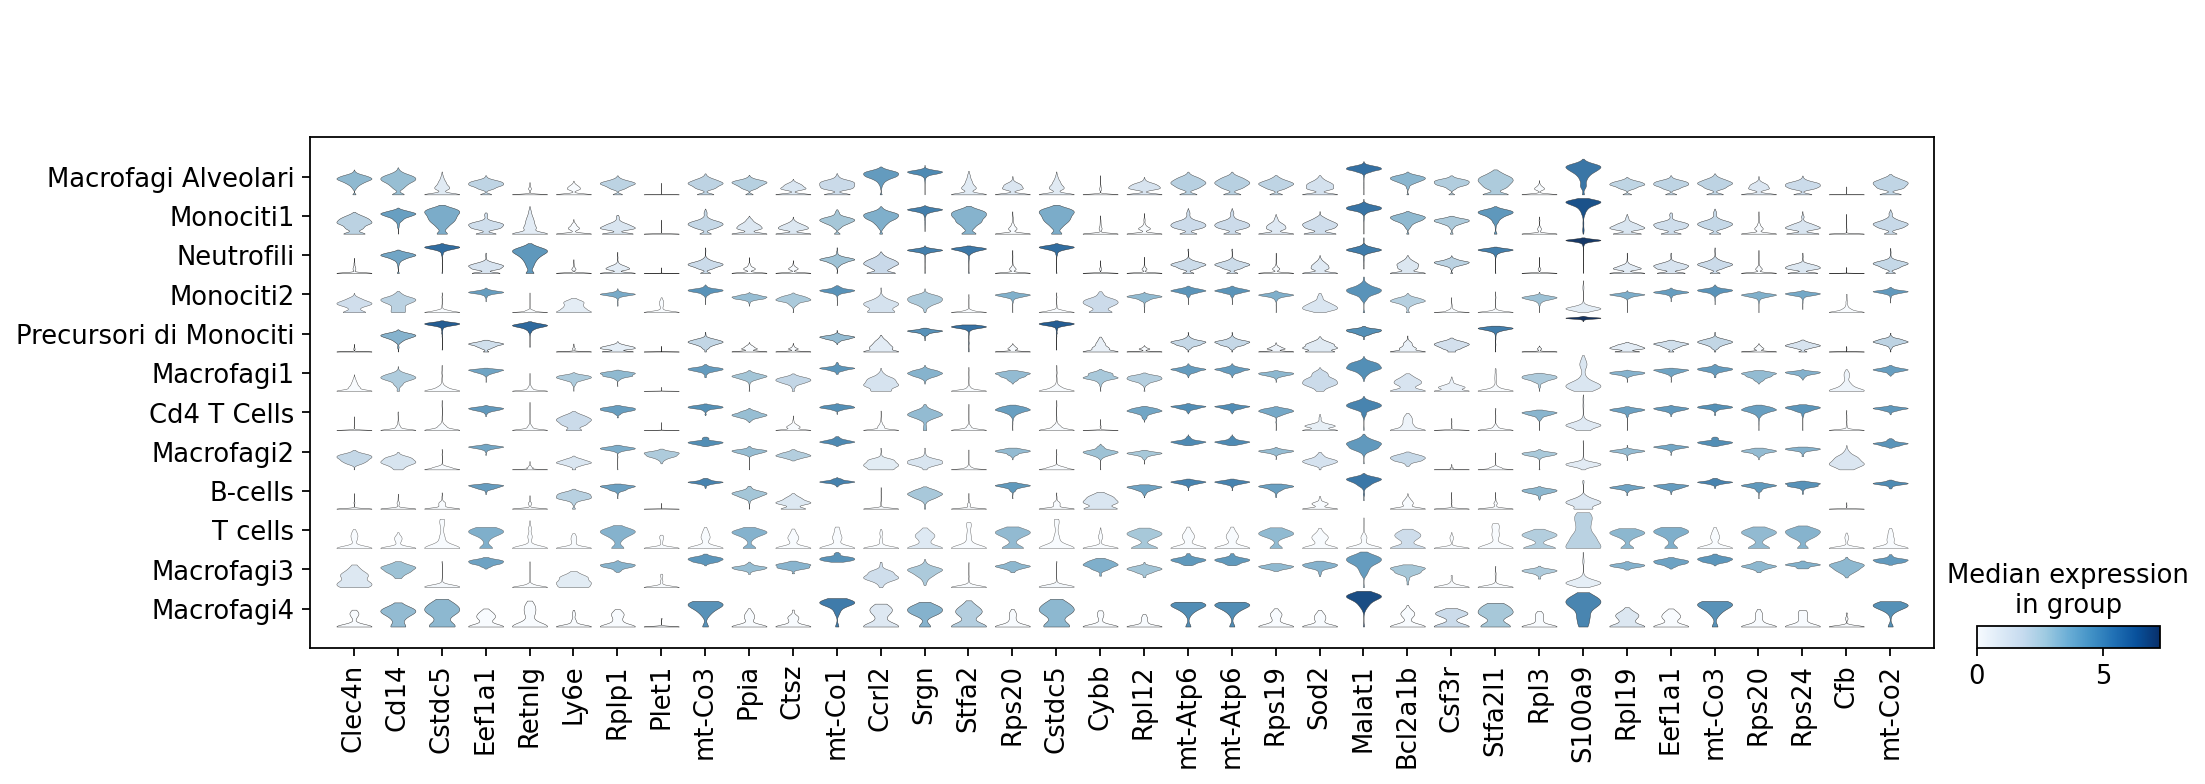

In [23]:
sc.pl.stacked_violin(adata_wilcoxon, marker_genes, groupby='leiden',rotation=90)

In [28]:
adata_wilcoxon.write(results_filean)

## Logreg Annotation

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:45)


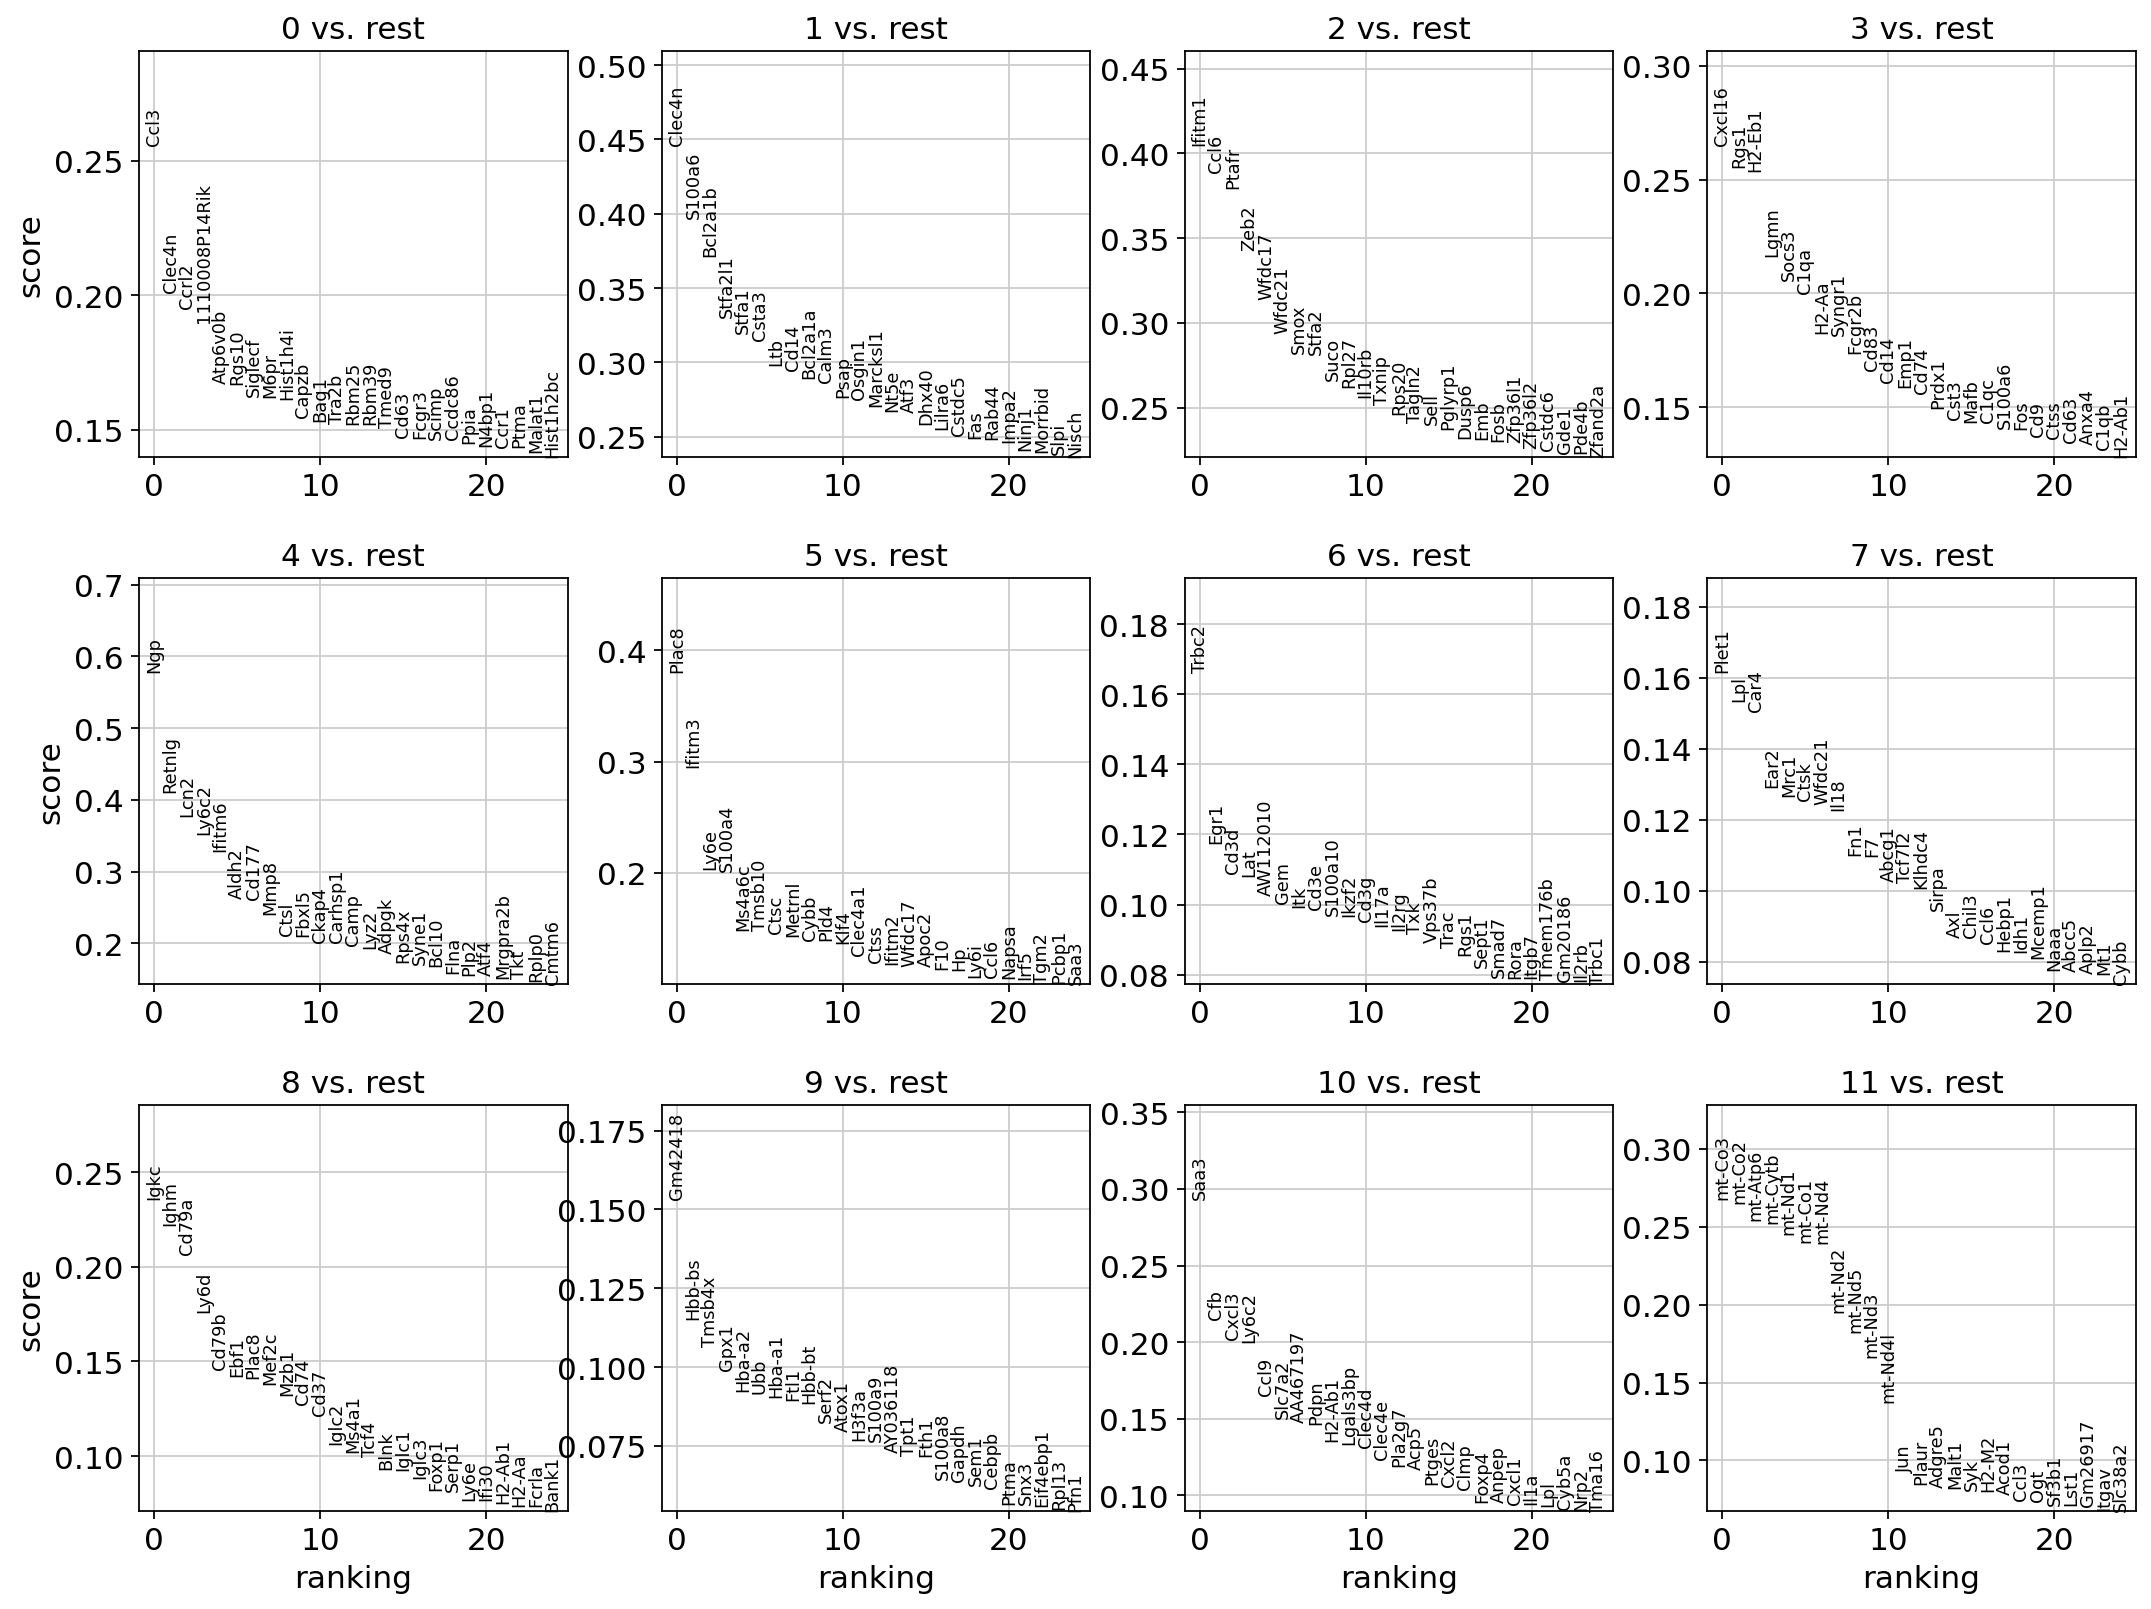

In [ ]:
sc.tl.rank_genes_groups(adata_logreg, 'leiden', method='logreg', solver='liblinear')
sc.pl.rank_genes_groups(adata_logreg, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(adata_logreg.uns['rank_genes_groups']['names']).head(20)

0         1        2       3        4        5         6  \
0            Ccl3    Clec4n   Ifitm1  Cxcl16      Ngp    Plac8     Trbc2   
1          Clec4n    S100a6     Ccl6    Rgs1   Retnlg   Ifitm3      Egr1   
2           Ccrl2   Bcl2a1b    Ptafr  H2-Eb1     Lcn2     Ly6e      Cd3d   
3   1110008P14Rik   Stfa2l1     Zeb2    Lgmn    Ly6c2   S100a4       Lat   
4         Atp6v0b     Stfa1   Wfdc17   Socs3   Ifitm6   Ms4a6c  AW112010   
5           Rgs10     Csta3   Wfdc21    C1qa    Aldh2   Tmsb10       Gem   
6         Siglecf       Ltb     Smox   H2-Aa    Cd177     Ctsc       Itk   
7            M6pr      Cd14    Stfa2  Syngr1     Mmp8   Metrnl      Cd3e   
8        Hist1h4i   Bcl2a1a     Suco  Fcgr2b     Ctsl     Cybb   S100a10   
9           Capzb     Calm3    Rpl27    Cd83    Fbxl5     Pld4     Ikzf2   
10           Bag1      Psap   Il10rb    Cd14    Ckap4     Klf4      Cd3g   
11          Tra2b    Osgin1    Txnip    Emp1  Carhsp1  Clec4a1     Il17a   
12          Rbm25  Marcksl1    Rps20    Cd74     Camp     Ctss     Il2rg   
13          Rbm39      Nt5e   Tagln2   Prdx1     Lyz2   Ifitm2       Txk   
14          Tmed9      Atf3     Sell    Cst3    Adpgk   Wfdc17    Vps37b   
15           Cd63     Dhx40  Pglyrp1    Mafb    Rps4x    Apoc2      Trac   
16          Fcgr3    Lilra6    Dusp6    C1qc    Syne1      F10      Rgs1   
17          Scimp    Cstdc5      Emb  S100a6    Bcl10       Hp     Sept1   
18         Ccdc86       Fas     Fosb     Fos     Flna     Ly6i     Smad7   
19           Ppia     Rab44  Zfp36l1     Cd9     Plp2     Ccl6      Rora   

         7      8         9        10       11  
0    Plet1   Igkc   Gm42418      Saa3   mt-Co3  
1      Lpl   Ighm    Hbb-bs       Cfb   mt-Co2  
2     Car4  Cd79a    Tmsb4x     Cxcl3  mt-Atp6  
3     Ear2   Ly6d      Gpx1     Ly6c2  mt-Cytb  
4     Mrc1  Cd79b    Hba-a2      Ccl9   mt-Nd1  
5     Ctsk   Ebf1       Ubb    Slc7a2   mt-Co1  
6   Wfdc21  Plac8    Hba-a1  AA467197   mt-Nd4  
7     Il18  Mef2c      Ftl1      Pdpn   mt-Nd2  
8      Fn1   Mzb1    Hbb-bt    H2-Ab1   mt-Nd5  
9       F7   Cd74     Serf2  Lgals3bp   mt-Nd3  
10   Abcg1   Cd37     Atox1    Clec4d  mt-Nd4l  
11  Tcf7l2  Iglc2     H3f3a    Clec4e      Jun  
12  Klhdc4  Ms4a1    S100a9    Pla2g7    Plaur  
13   Sirpa   Tcf4  AY036118      Acp5   Adgre5  
14     Axl   Blnk      Tpt1     Ptges    Malt1  
15   Chil3  Iglc1      Fth1     Cxcl2      Syk  
16    Ccl6  Iglc3    S100a8      Clmp    H2-M2  
17   Hebp1  Foxp1     Gapdh     Foxp4    Acod1  
18    Idh1  Serp1      Sem1     Anpep     Ccl3  
19  Mcemp1   Ly6e     Cebpb     Cxcl1      Ogt

In [ ]:
marker_genes = ['Ccl3',	'Clec4n','Ifitm1','Cxcl16','Ngp','Plac8','Trbc2','Plet1','Igkc',
	'Gm42418','Saa3','mt-Co3','Clec4n','S100a6','Ccl6','Rgs1','Retnlg',	'Ifitm3','Egr1','Lpl','Ighm','Hbb-bs',
    'Cfb','mt-Co2','Ccrl2','Bcl2a1b','Ptafr','H2-Eb1','Lcn2','Ly6e','Cd3d','Car4','Cd79a','Tmsb4x','Cxcl3',	'mt-Atp6']

In [ ]:
result = adata_logreg.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores']}).head(10)

0_n       0_s      1_n       1_s     2_n       2_s     3_n  \
0           Ccl3  0.255803   Clec4n  0.446342  Ifitm1  0.405020  Cxcl16   
1         Clec4n  0.201149   S100a6  0.397345    Ccl6  0.389259    Rgs1   
2          Ccrl2  0.195261  Bcl2a1b  0.371718   Ptafr  0.379636  H2-Eb1   
3  1110008P14Rik  0.189992  Stfa2l1  0.330731    Zeb2  0.342803    Lgmn   
4        Atp6v0b  0.167467    Stfa1  0.319821  Wfdc17  0.313978   Socs3   
5          Rgs10  0.167197    Csta3  0.315397  Wfdc21  0.293941    C1qa   
6        Siglecf  0.162614      Ltb  0.298287    Smox  0.282173   H2-Aa   
7           M6pr  0.162390     Cd14  0.295218   Stfa2  0.281507  Syngr1   
8       Hist1h4i  0.161573  Bcl2a1a  0.289201    Suco  0.266499  Fcgr2b   
9          Capzb  0.154675    Calm3  0.286743   Rpl27  0.262151    Cd83   

        3_s     4_n       4_s  ...     7_n       7_s    8_n       8_s  \
0  0.265201     Ngp  0.578544  ...   Plet1  0.161628   Igkc  0.235892   
1  0.255351  Retnlg  0.411275  ...     Lpl  0.153460   Ighm  0.221946   
2  0.253675    Lcn2  0.377889  ...    Car4  0.150608  Cd79a  0.206888   
3  0.216549   Ly6c2  0.352388  ...    Ear2  0.129283   Ly6d  0.175846   
4  0.205749  Ifitm6  0.328127  ...    Mrc1  0.126765  Cd79b  0.146218   
5  0.200060   Aldh2  0.262569  ...    Ctsk  0.125652   Ebf1  0.142513   
6  0.182756   Cd177  0.261196  ...  Wfdc21  0.124298  Plac8  0.141356   
7  0.181634    Mmp8  0.240366  ...    Il18  0.122746  Mef2c  0.138055   
8  0.173957    Ctsl  0.211387  ...     Fn1  0.110043   Mzb1  0.132378   
9  0.166333   Fbxl5  0.210172  ...      F7  0.109661   Cd74  0.127579   

       9_n       9_s      10_n      10_s     11_n      11_s  
0  Gm42418  0.153368      Saa3  0.293576   mt-Co3  0.267977  
1   Hbb-bs  0.115250       Cfb  0.215196   mt-Co2  0.265070  
2   Tmsb4x  0.106789     Cxcl3  0.202015  mt-Atp6  0.254611  
3     Gpx1  0.099043     Ly6c2  0.200060  mt-Cytb  0.252718  
4   Hba-a2  0.092378      Ccl9  0.165543   mt-Nd1  0.245080  
5      Ubb  0.091658    Slc7a2  0.150608   mt-Co1  0.240502  
6   Hba-a1  0.090542  AA467197  0.147606   mt-Nd4  0.239329  
7     Ftl1  0.089500      Pdpn  0.146450   mt-Nd2  0.195015  
8   Hbb-bt  0.088543    H2-Ab1  0.135543   mt-Nd5  0.182239  
9    Serf2  0.082559  Lgals3bp  0.133238   mt-Nd3  0.166384  

[10 rows x 24 columns]

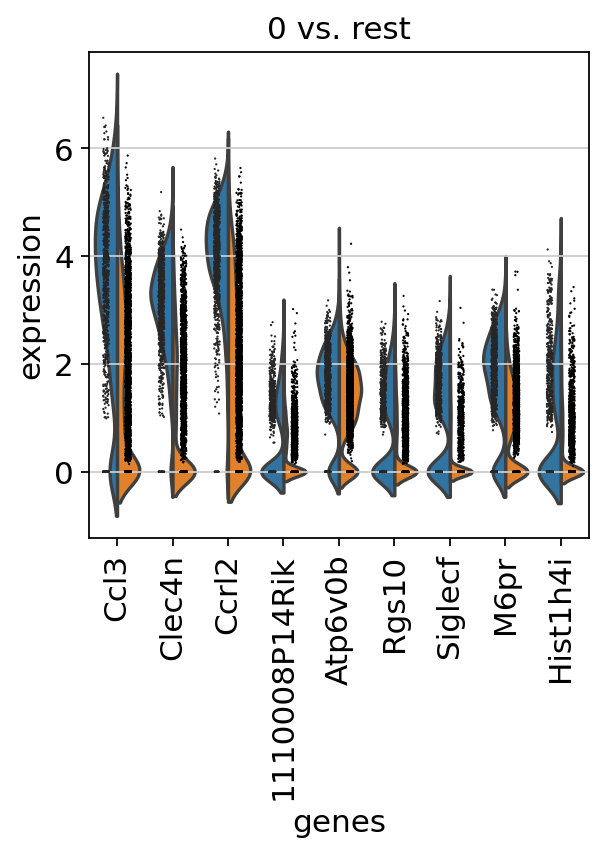

In [ ]:
sc.pl.rank_genes_groups_violin(adata_logreg, groups='0', n_genes=9)

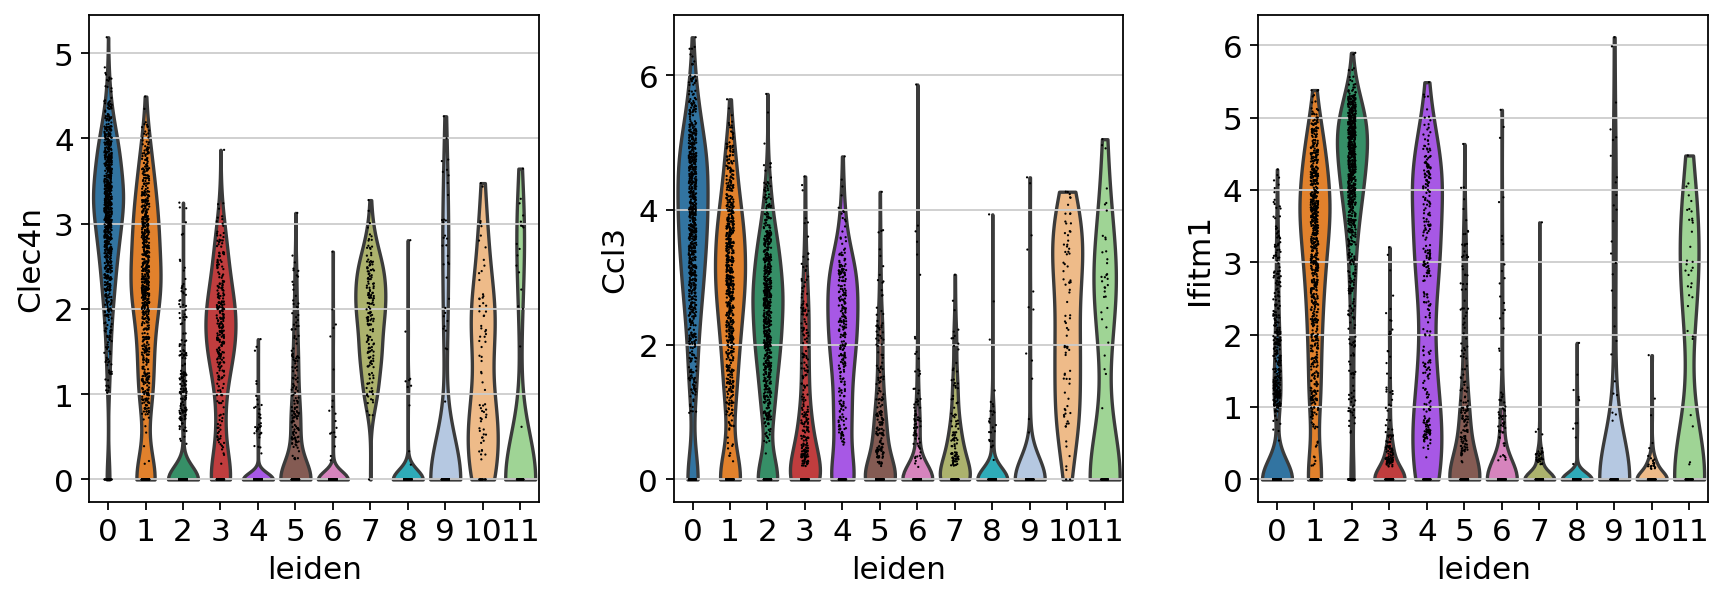

In [ ]:
sc.pl.violin(adata_logreg, ['Clec4n', 'Ccl3', 'Ifitm1'], groupby='leiden')

In [ ]:
new_cluster_names = [
    'Macrophages', 'Macrophages2', 'T cells2', 'Macrophages3','Neutrophils', 'CD4 T','T cells', 'Dendritic cells','B lymphocytes','NIH 3T3 Cells','Macrophages4','Macrophages5']
adata_logreg.rename_categories('leiden', new_cluster_names)

/home/chiara/anaconda3/envs/scan/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


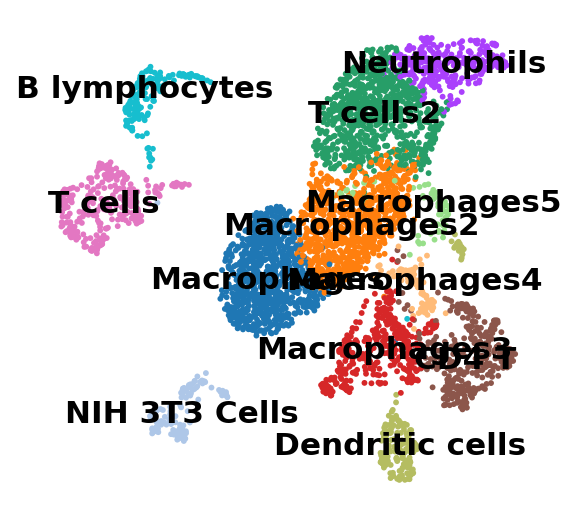

In [ ]:
sc.pl.umap(adata_logreg,color='leiden',legend_loc='on data', title='', frameon=False, save='.pdf')

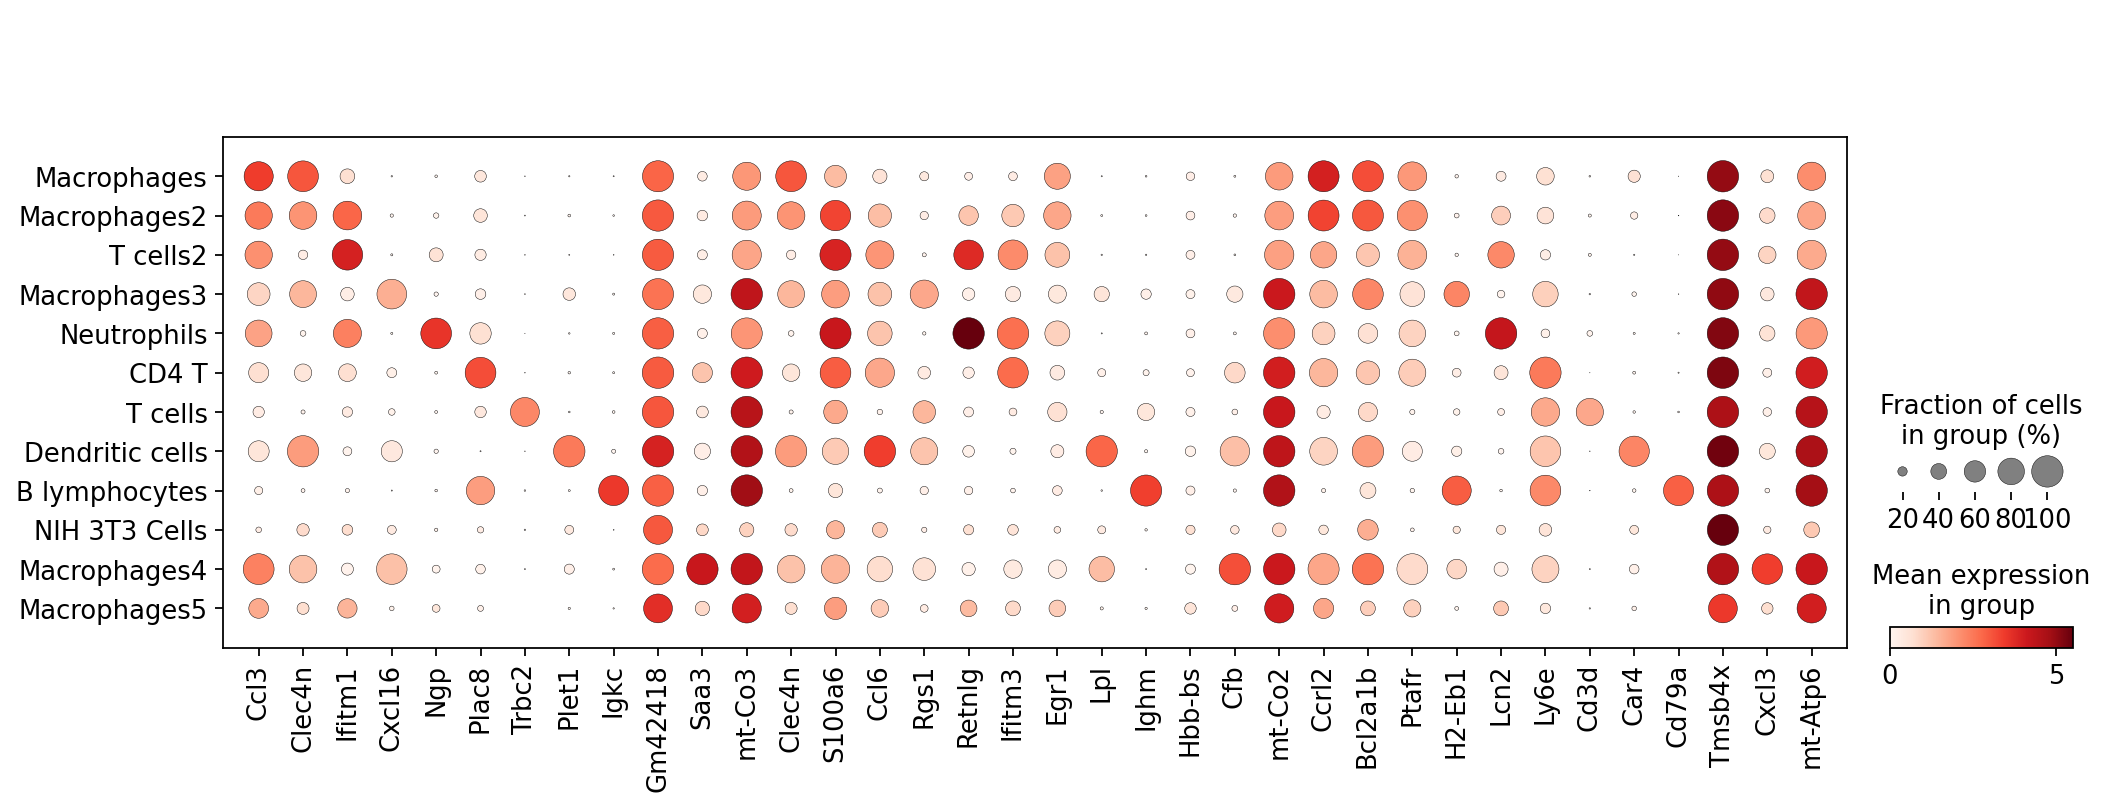

In [ ]:
sc.pl.dotplot(adata_logreg, marker_genes, groupby='leiden')

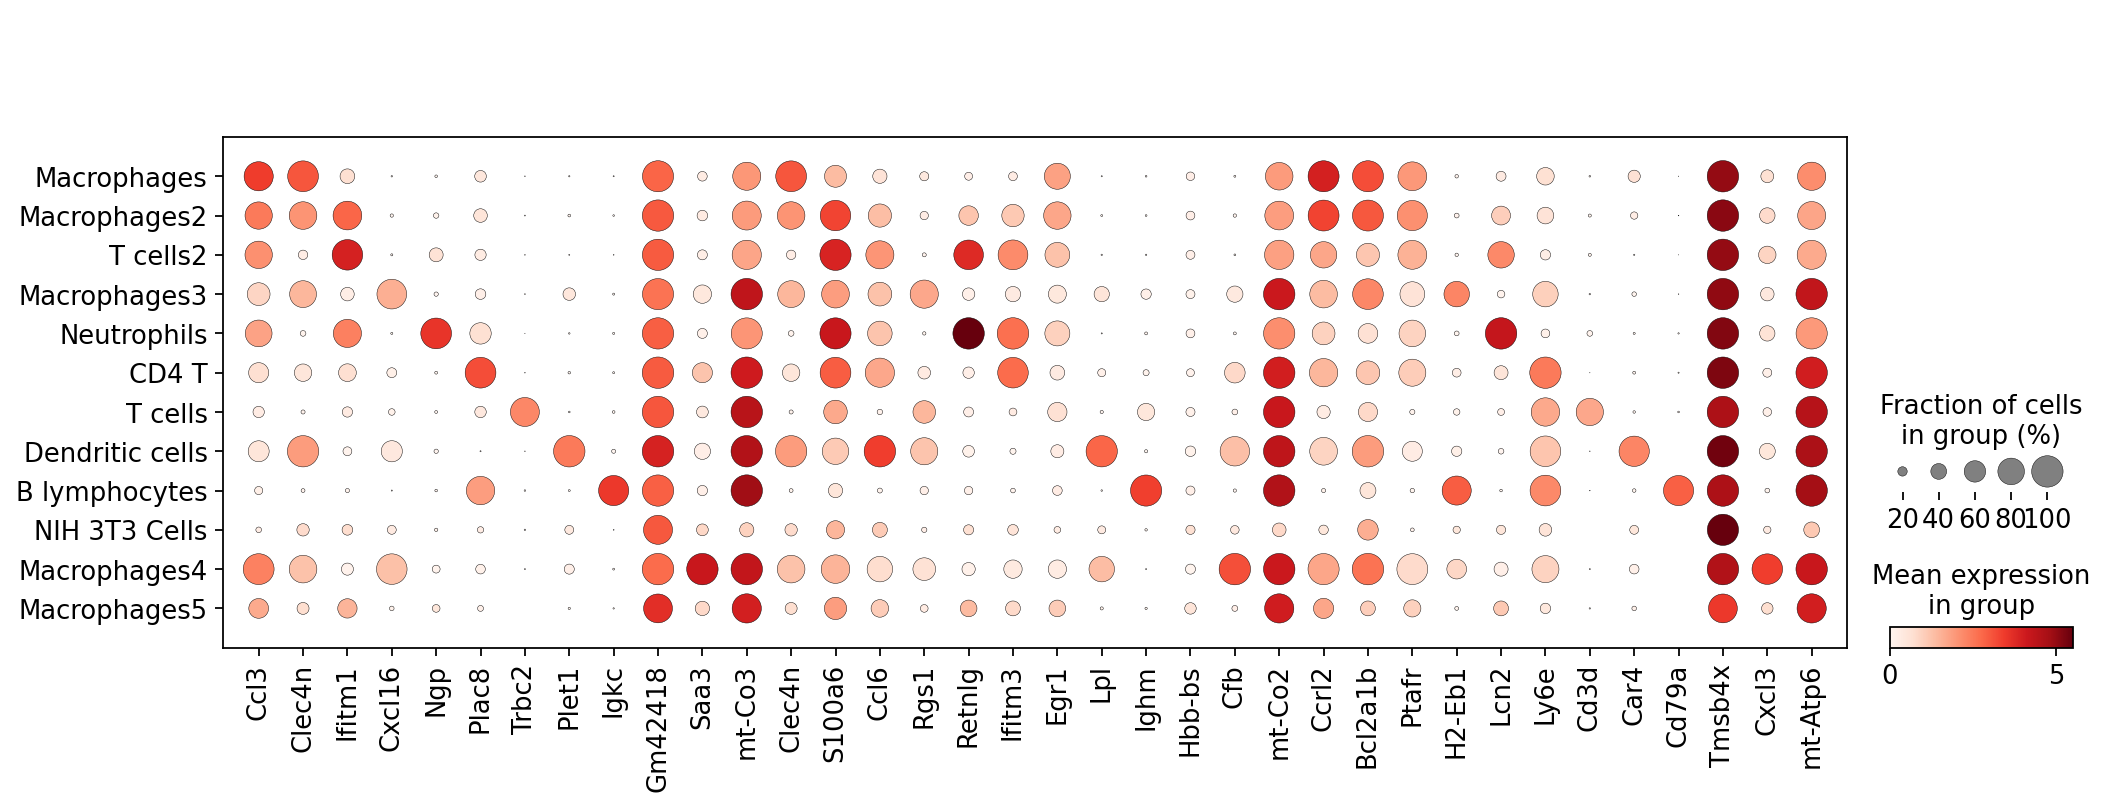

In [ ]:
sc.pl.dotplot(adata_logreg, marker_genes, groupby='leiden',)

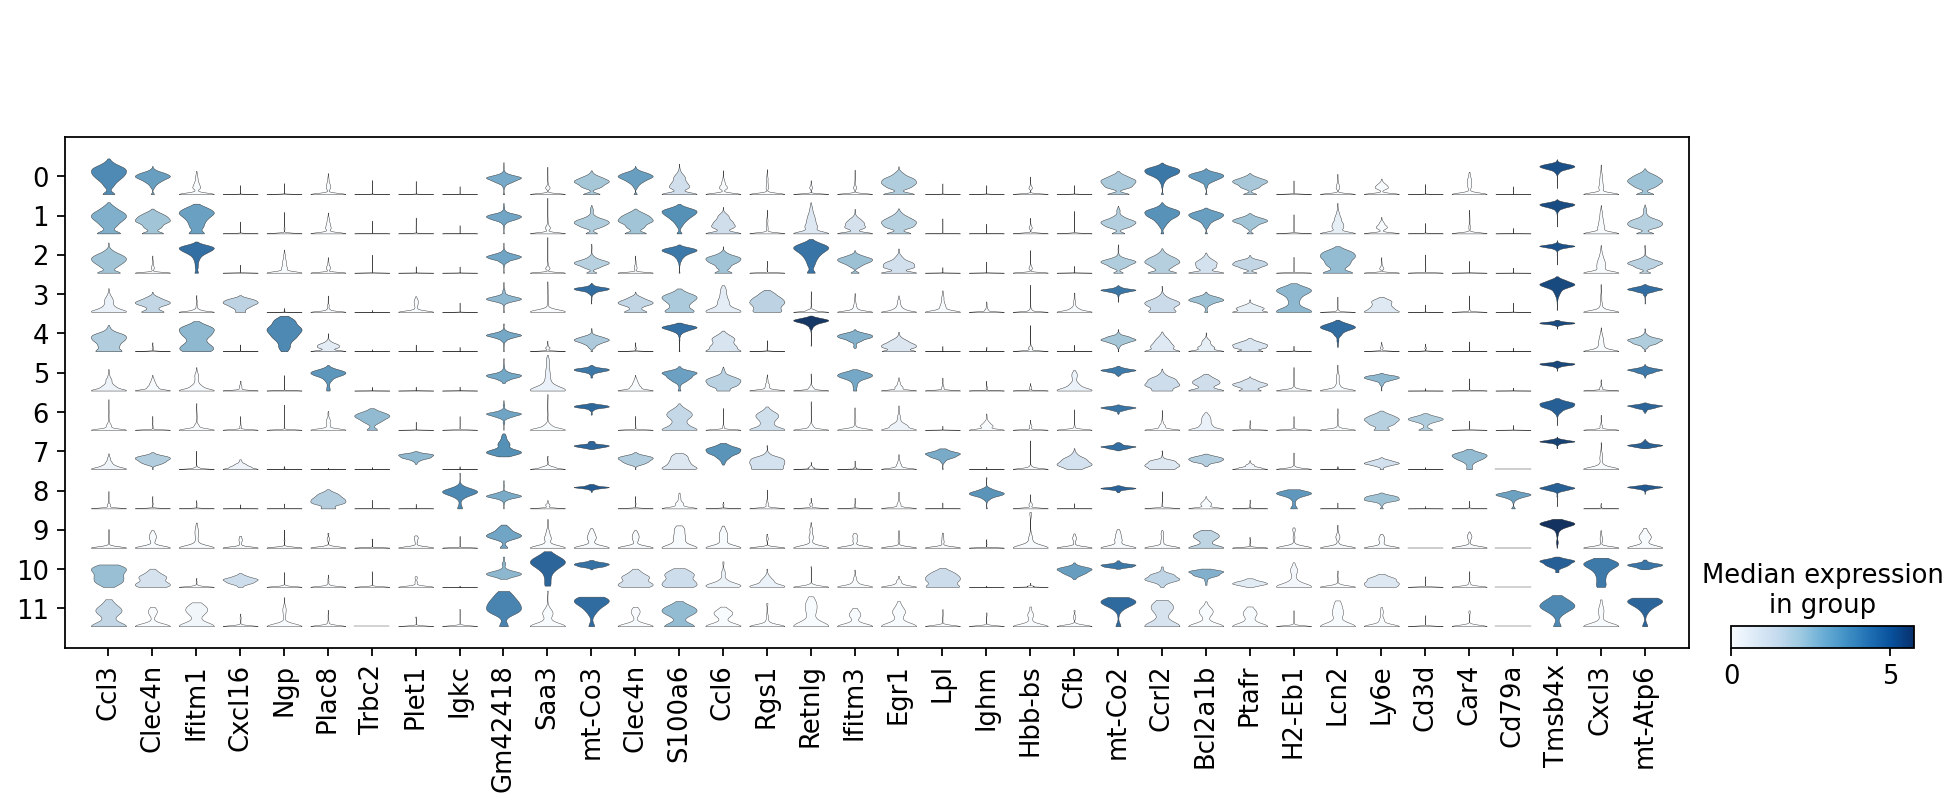

In [ ]:
sc.pl.stacked_violin(adata_logreg, marker_genes, groupby='leiden',rotation=90)

In [ ]:
adata_macrophages = adata_logreg[adata_logreg.obs['leiden'].isin(['Macrophages','Macrophages2','Macrophages3','Macrophages4','Macrophages5']),:]

/home/chiara/anaconda3/envs/scan/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


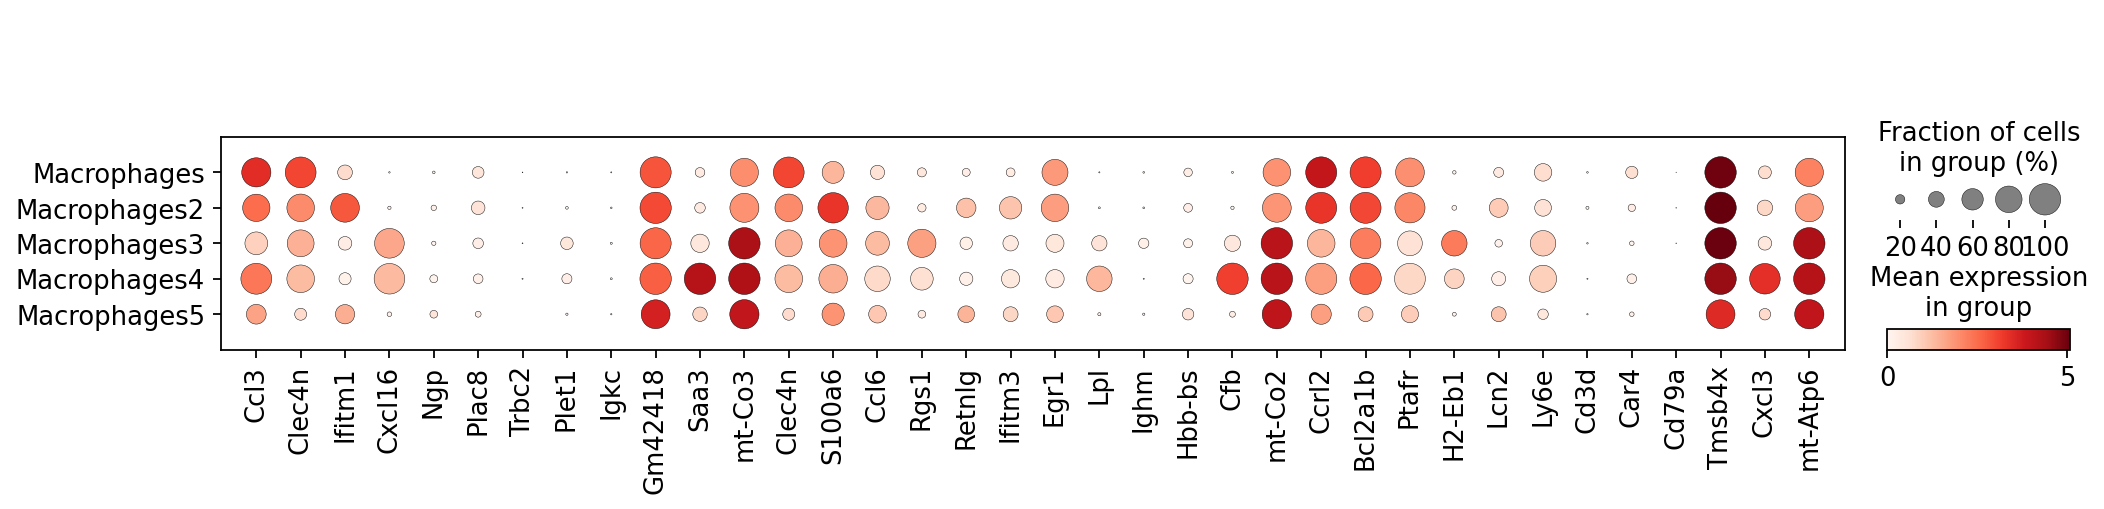

In [ ]:
sc.pl.dotplot(adata_macrophages,marker_genes, groupby='leiden')

In [ ]:
adata_tcells = adata_logreg[adata_logreg.obs['leiden'].isin(['T cells','T cells2']),:]

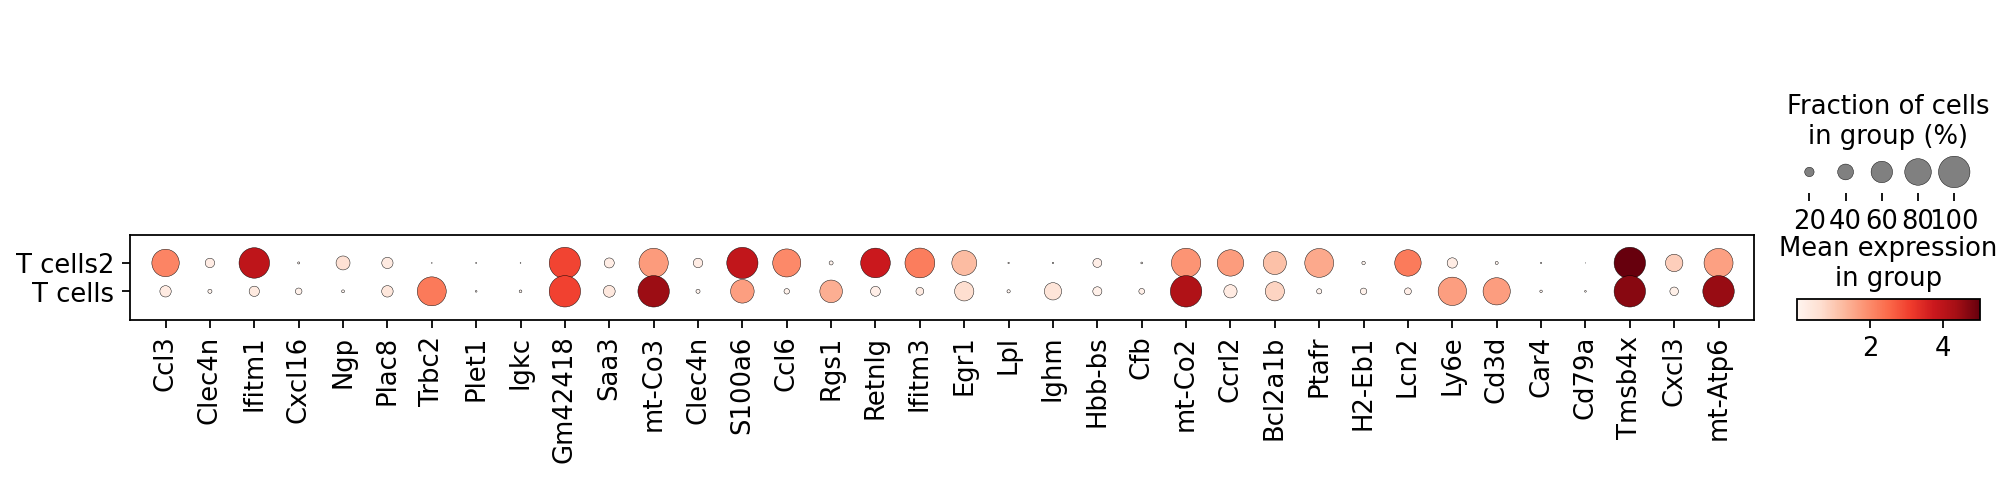

In [ ]:
sc.pl.dotplot(adata_tcells,marker_genes, groupby='leiden')